<a href="https://colab.research.google.com/github/mmafsahi/HW-1-KEN-KEN/blob/master/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [228]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h2> Importing Needed Libraries and Reading the Data<h2>

In [229]:
import pandas as pd
import numpy as np

In [230]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/Automobile_data.csv')

In [231]:
df.info()   # Thre are 16 object types in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [232]:
df.head()  # head od the data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front[front],88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front?,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front?,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,"front,",99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,"front,front",99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


<h1> Data Cleaning and Exploratory Data Analysis</h1>

In [233]:
# Importting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to c

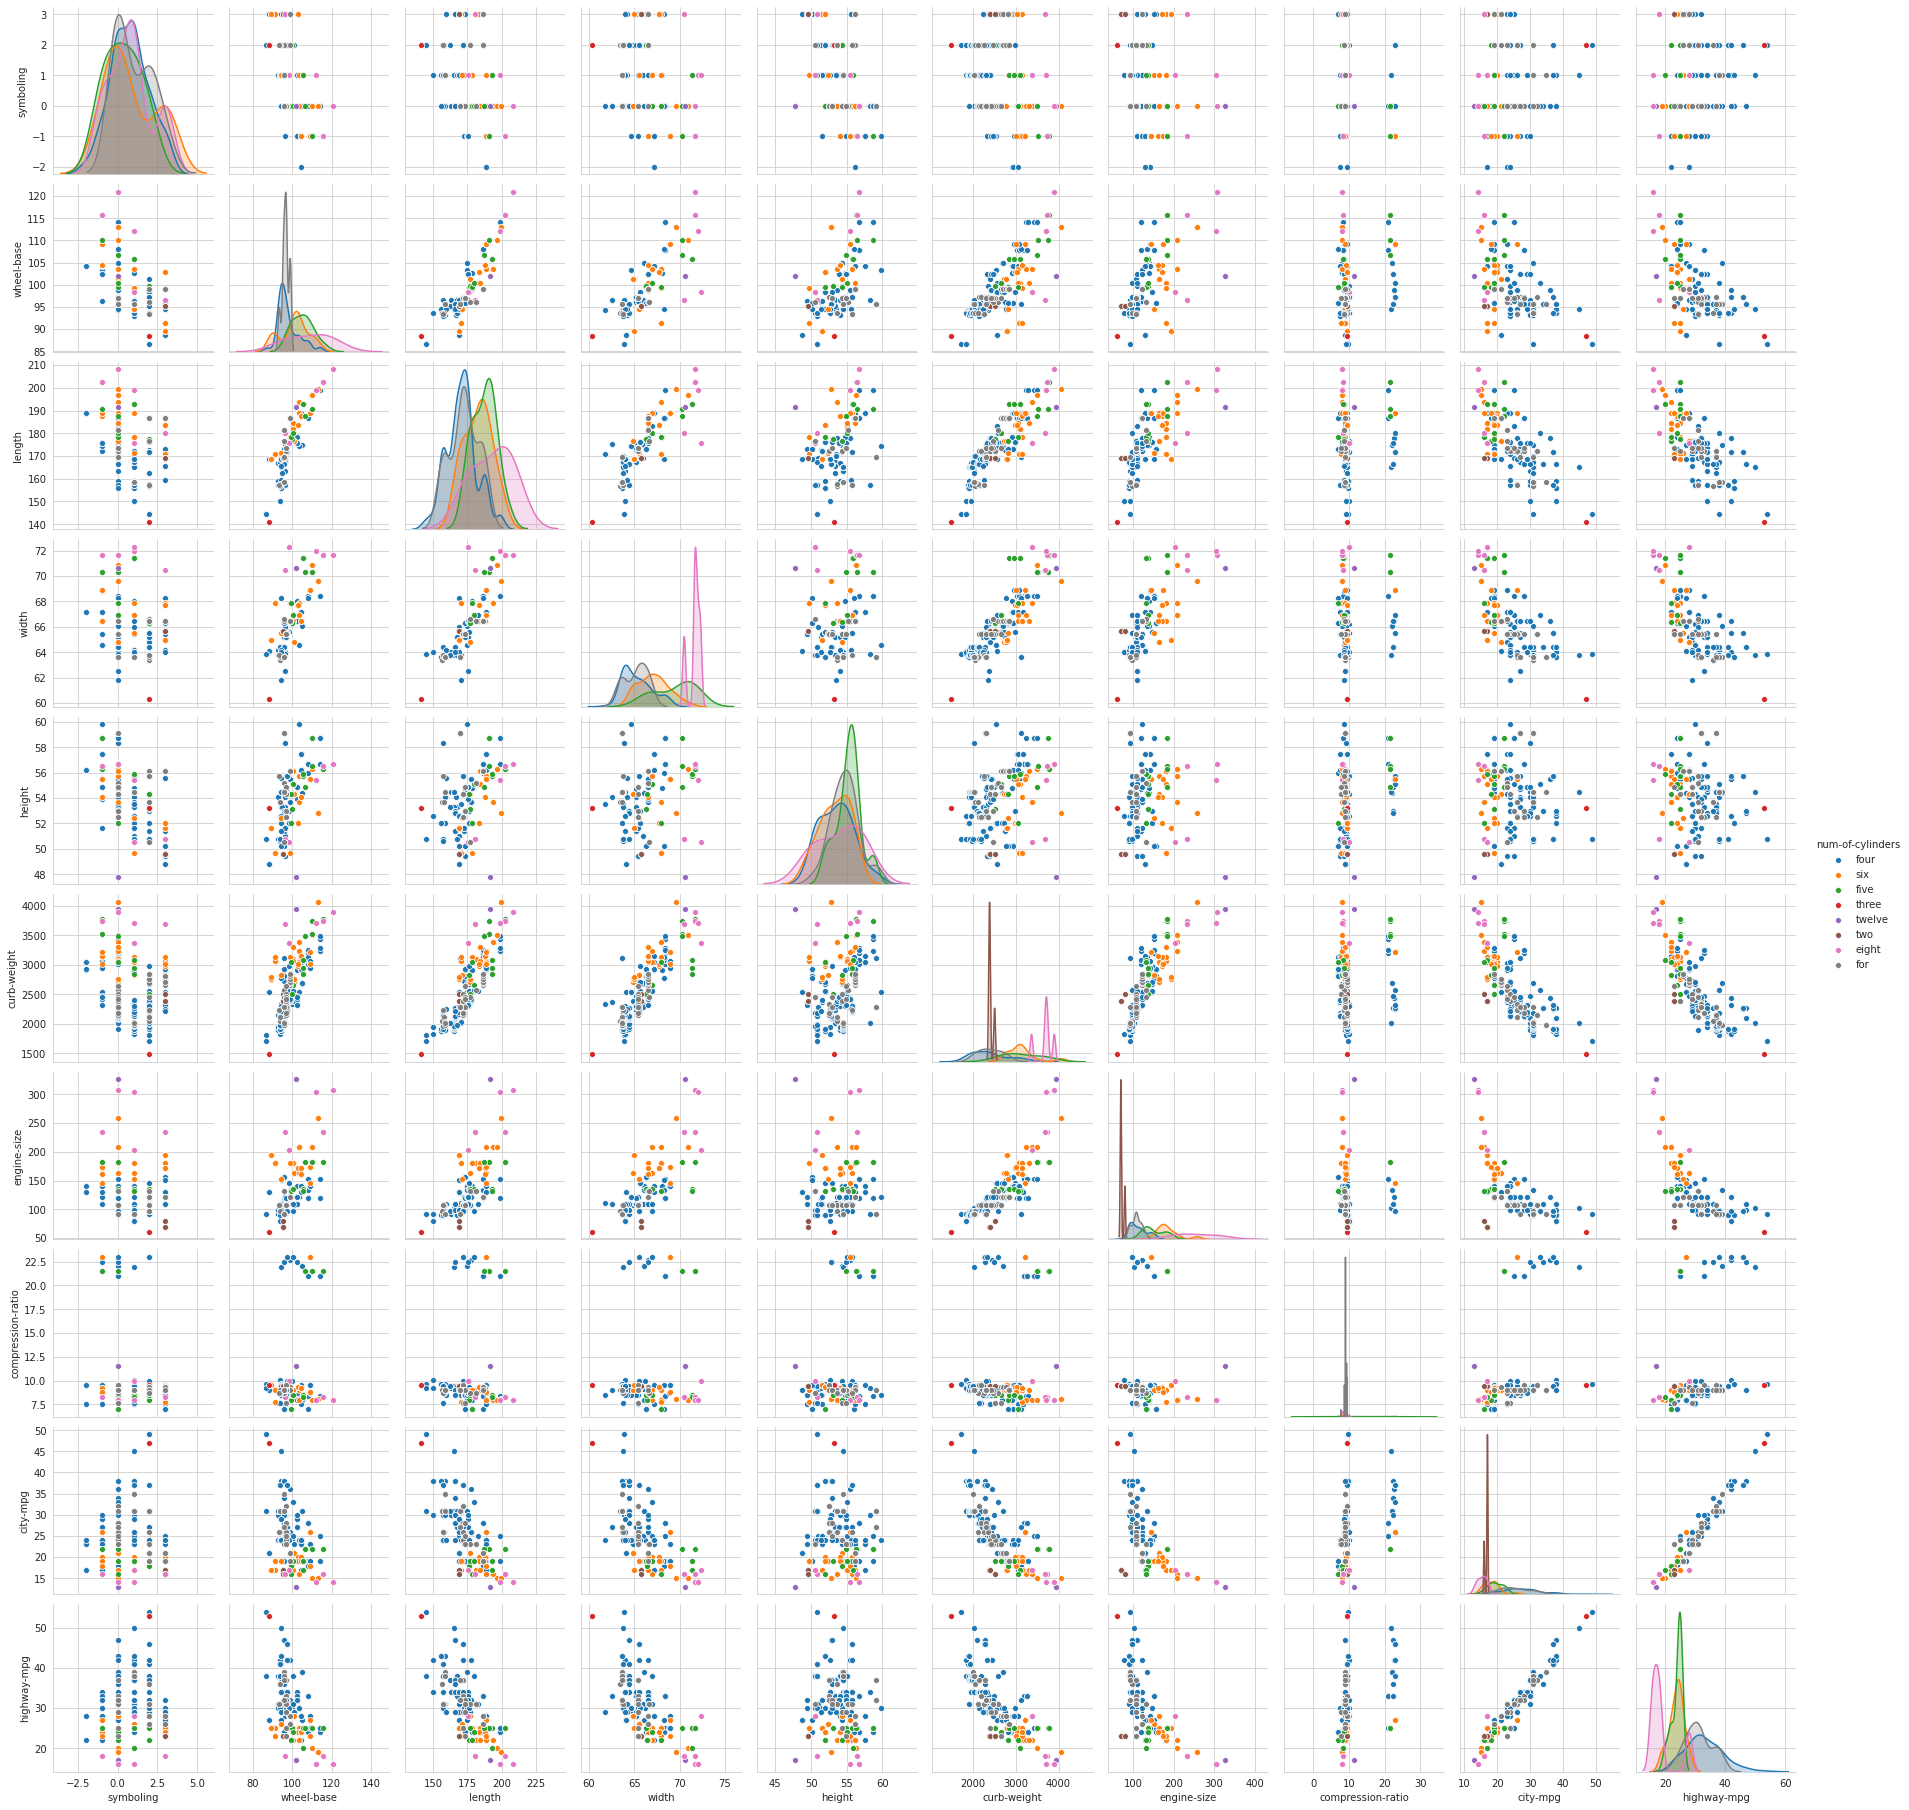

In [234]:
sns.pairplot(df, hue='num-of-cylinders')  # getting a broad idea of how the data looks like

In [236]:
df.corr() # finding the correlations for the numeric values before cleaning the data.

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,-0.035823,0.034606
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,-0.470414,-0.544082
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,-0.670909,-0.704662
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,-0.642704,-0.677218
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.048640,-0.107358
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,-0.757414,-0.797465
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,-0.653658,-0.677470
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,0.324701,0.265201
city-mpg,-0.035823,-0.470414,-0.670909,-0.642704,-0.048640,-0.757414,-0.653658,0.324701,1.000000,0.971337
highway-mpg,0.034606,-0.544082,-0.704662,-0.677218,-0.107358,-0.797465,-0.677470,0.265201,0.971337,1.000000


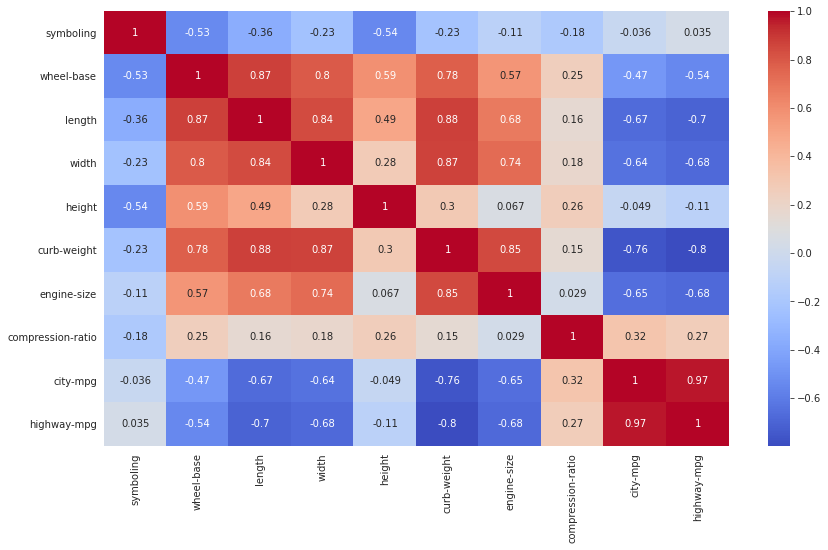

In [237]:
# not quite precise before cleaning the data there are many other numerical values that are string type 

fig=plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', linecolor='black')
plt.show()

In [238]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


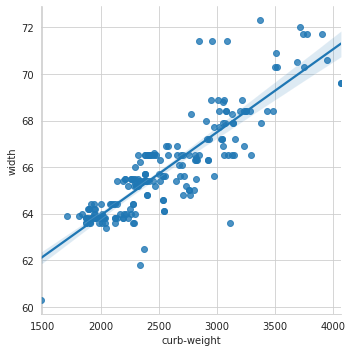

In [239]:
sns.lmplot(x='curb-weight',y='width',data=df)

In [240]:
# function to transform the string price to numeric vales
def func(text):
  if text=='?':
    return np.nan
  else:
    return int(text)


In [241]:
df['price']=df['price'].apply(lambda price:func(price))

In [242]:
df['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [243]:
# There are 4 NaN' in price column
df['price'].isnull().sum()

4

In [244]:
df['price'].mean()

13207.129353233831

In [245]:
len(df['price'])

205

In [246]:
# filling the NaN vals with avegarage of the column.
df['price']=df['price'].fillna(df['price'].mean())

In [247]:
df['price'].isnull().sum()

0

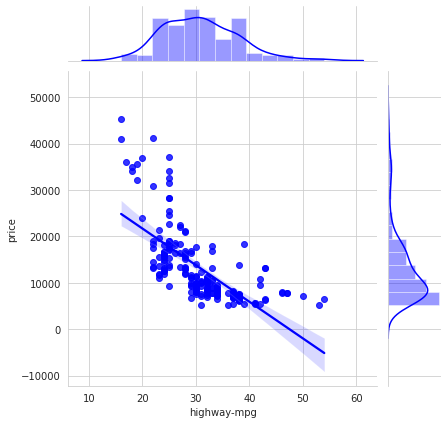

In [248]:
# price and highway-mpg has a negative slope, which make sense
sns.jointplot(x='highway-mpg',y='price',data=df,kind='reg', color='blue')

In [249]:
df['num-of-cylinders'].value_counts()

four      134
for        25
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

In [250]:
# num-of-cylinders val is a string type it should be a numeric val
type(df['num-of-cylinders'][0])

str

In [251]:
# crating a dictionary to map the number os cylinders
d = {'four':4,
   'for': 4,
   'six': 6,
   'five':5,   
   'eight': 8,
   'two': 2,
   'twelve':12,
   'three':3 }

In [252]:
df['num-of-cylinders']=df['num-of-cylinders'].map(d)

In [253]:
df.head(6)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front[front],88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front?,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front?,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,"front,",99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,"front,front",99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450.0
5,2,?,audi,gas,std,two,sedan,fwd,"front,",99.8,177.3,66.3,53.1,2507,ohc,5,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250.0


In [254]:
type(df['num-of-cylinders'][3])

numpy.int64

In [255]:
df.corr()[['price','num-of-cylinders']] # high corr

,price,num-of-cylinders
symboling,-0.082201,-0.113129
wheel-base,0.583168,0.339507
length,0.682986,0.430672
width,0.728699,0.545007
height,0.134388,-0.013995
curb-weight,0.820825,0.609727
num-of-cylinders,0.687770,1.000000
engine-size,0.861752,0.846031
compression-ratio,0.070990,-0.020002
city-mpg,-0.667449,-0.445837


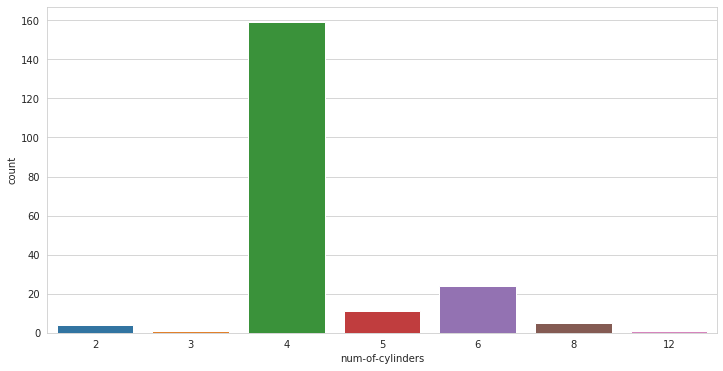

In [256]:
# EDA to get an idea that how this val is distributed
plt.figure(figsize=(12,6))
sns.countplot(df['num-of-cylinders'])

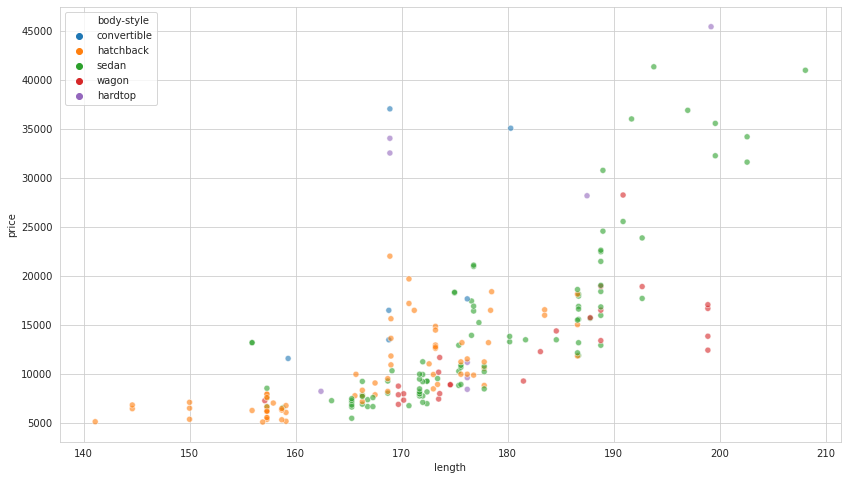

In [257]:
# EDA on length and price vals that it looks a logarithmic relations
plt.figure(figsize=(14,8))
sns.scatterplot(x='length',y='price',hue='body-style',data=df,alpha=.6)

In [258]:
# There are two types of the cars in term of the doors with the two missing vals
df['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [260]:
# function to convert the string type to a numeric type of the doors with taking care of NaN vals
def transform_door(text):
  if text=='?':
    return np.nan
  elif text=='four':
    return (4/1)
  else: 
    return (2/1)


In [261]:
df['num-of-doors']=df['num-of-doors'].apply(lambda x:transform_door(x))


In [262]:
df['num-of-doors'].value_counts()

4.0    114
2.0     89
Name: num-of-doors, dtype: int64

In [263]:
type(df['num-of-doors'][0])

numpy.float64

In [264]:
# There are two missing vals on this col, let dro those indexes because the mean of the 2,4 is not meaningfull for a three door car.
df['num-of-doors'].isnull().sum()

2

In [265]:
df['num-of-doors'].dropna(inplace=True)

In [266]:
df['num-of-doors'].isnull().sum()

0

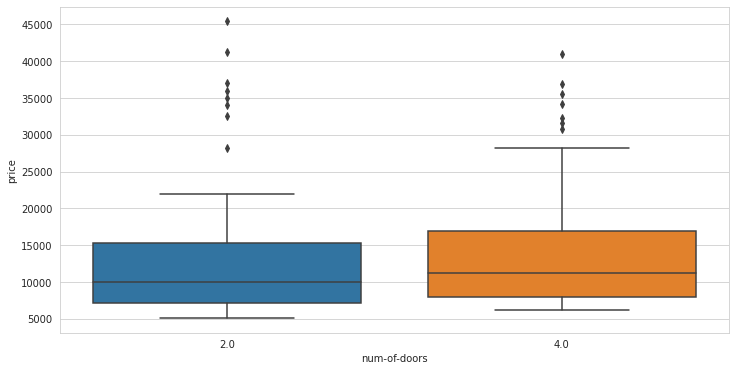

In [267]:
# EDA on a box plot shows that there are a lots of outliers on them that could affect, I will taking care of this later below.
plt.figure(figsize=(12,6))
sns.boxplot(x='num-of-doors',y='price',data=df)

In [268]:
df.corr()[['price','num-of-doors']] # low corr 

,price,num-of-doors
symboling,-0.082201,-0.664550
num-of-doors,0.046051,1.000000
wheel-base,0.583168,0.445696
length,0.682986,0.393593
width,0.728699,0.202072
height,0.134388,0.547651
curb-weight,0.820825,0.195683
num-of-cylinders,0.687770,-0.016530
engine-size,0.861752,0.017519
compression-ratio,0.070990,0.165799


In [269]:
# Low corr between price and num-of-doors better to drop this col
df.drop('num-of-doors',axis=1,inplace=True)

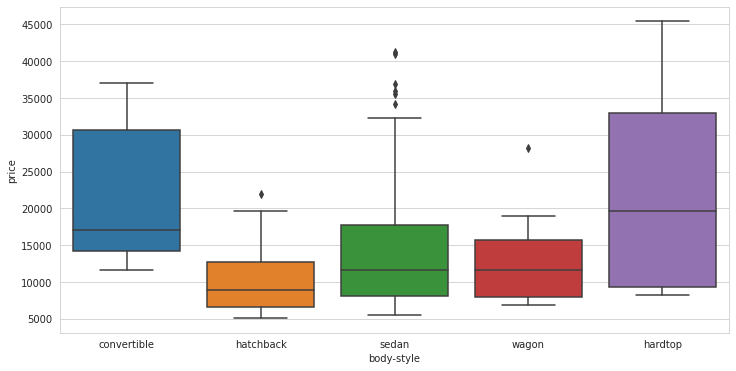

In [270]:
# EDA with the boxplot visually determins that hardtop cars and convertible cars have higher price than other types of other cars
plt.figure(figsize=(12,6))
sns.boxplot(x='body-style',y='price',data=df)

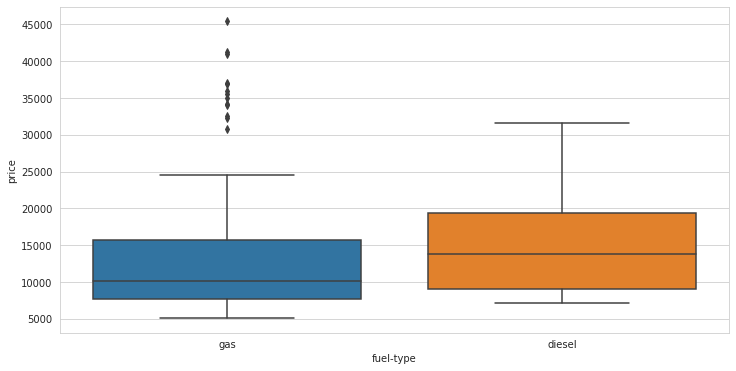

In [271]:
# Viasually can find that there are lots of outlier for the gas type cars in term of their prices
plt.figure(figsize=(12,6))
sns.boxplot(x='fuel-type',y='price',data=df)

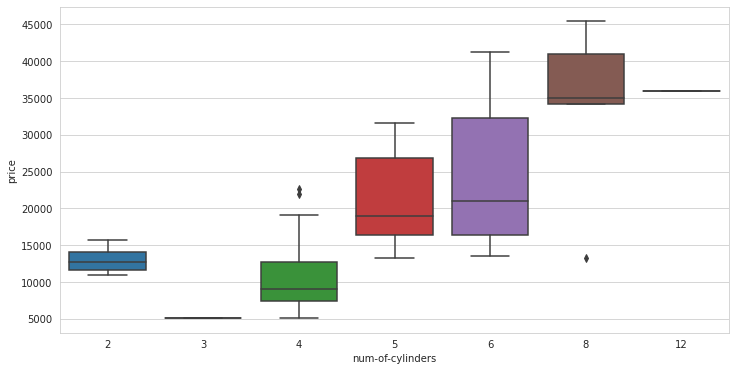

In [272]:
# EDA on num-of-cylinders how the 2,3 and 12 cylinders are special in our data and also how they are spreaded.
plt.figure(figsize=(12,6))
sns.boxplot(x='num-of-cylinders',y='price',data=df)

In [273]:
type(df.symboling[0])

numpy.int64

In [274]:
type(df['normalized-losses'][0]) # This col is a string type let find out its effect on the data.


str

In [275]:
df['normalized-losses'].value_counts() # there are 41's of missing vals, let clean this and then transform it to an int value

?      41
161    11
91      8
150     7
104     6
128     6
134     6
95      5
74      5
65      5
103     5
94      5
168     5
102     5
85      5
148     4
106     4
122     4
118     4
93      4
83      3
154     3
101     3
115     3
137     3
125     3
153     2
145     2
89      2
194     2
164     2
113     2
197     2
108     2
110     2
192     2
158     2
81      2
129     2
188     2
119     2
87      2
121     1
256     1
231     1
142     1
107     1
78      1
98      1
90      1
77      1
186     1
Name: normalized-losses, dtype: int64

In [276]:
# function to convert the normalized-losses val
def clean_normalizedLosses_col(text):
  if text=='?':
    return np.nan
  elif '?' in text:
    return np.nan
  else:
    return int(text)


In [277]:
df['normalized-losses']=df['normalized-losses'].apply(lambda text: clean_normalizedLosses_col(text))

In [278]:
df['normalized-losses'].isnull().sum()

41

In [279]:
type(df['normalized-losses'][56])

numpy.float64

In [280]:
# The correlation of the normalized-losses and price is 0.13, so not that high and it could npt be a very important val 
df.corr()[['price','normalized-losses']] 

,price,normalized-losses
symboling,-0.082201,0.528667
normalized-losses,0.203254,1.000000
wheel-base,0.583168,-0.074362
length,0.682986,0.023220
width,0.728699,0.105073
height,0.134388,-0.432335
curb-weight,0.820825,0.119893
num-of-cylinders,0.687770,0.175380
engine-size,0.861752,0.167365
compression-ratio,0.070990,-0.132654


In [281]:
df['normalized-losses'].fillna(df['normalized-losses'].mean(),inplace=True)

In [282]:
df['normalized-losses'].value_counts() 

122.0    45
161.0    11
91.0      8
150.0     7
104.0     6
134.0     6
128.0     6
94.0      5
74.0      5
85.0      5
103.0     5
168.0     5
95.0      5
65.0      5
102.0     5
148.0     4
106.0     4
93.0      4
118.0     4
115.0     3
154.0     3
125.0     3
137.0     3
101.0     3
83.0      3
194.0     2
110.0     2
145.0     2
119.0     2
197.0     2
108.0     2
188.0     2
129.0     2
81.0      2
164.0     2
192.0     2
158.0     2
153.0     2
87.0      2
89.0      2
113.0     2
121.0     1
98.0      1
186.0     1
78.0      1
107.0     1
77.0      1
90.0      1
256.0     1
231.0     1
142.0     1
Name: normalized-losses, dtype: int64

In [283]:
# While there is a low correlation between price and normalized-losses let drop this column 
df.drop('normalized-losses',axis=1,inplace=True)

In [284]:
df.info()  # There are 12 more objects types to be convert into numeric vals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   make               205 non-null    object 
 2   fuel-type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   wheel-base         205 non-null    float64
 8   length             205 non-null    float64
 9   width              205 non-null    float64
 10  height             205 non-null    float64
 11  curb-weight        205 non-null    int64  
 12  engine-type        205 non-null    object 
 13  num-of-cylinders   205 non-null    int64  
 14  engine-size        205 non-null    int64  
 15  fuel-system        205 non-null    object 
 16  bore               205 non

In [285]:
# While the name of the make is not very important, but it may affect on the price, so I will keep the top 10 companies.

In [286]:
df.make.value_counts().sort_values(ascending=False).head(10).index

Index(['toyota', 'nissan', 'mazda', 'honda', 'mitsubishi', 'volkswagen',
       'subaru', 'peugot', 'volvo', 'dodge'],
      dtype='object')

In [287]:
top_10=[label for label in df.make.value_counts().sort_values(ascending=False).head(10).index ]

In [288]:
top_10

['toyota',
 'nissan',
 'mazda',
 'honda',
 'mitsubishi',
 'volkswagen',
 'subaru',
 'peugot',
 'volvo',
 'dodge']

In [289]:
# creating a function to encode the string type of make val to numeric vals of 0 and 1's.
def one_hot_top_x(data,col,top_x_labels):

  for label in top_x_labels:
    data[col + '_' + label ]=np.where(data[col]==label,1,0)



In [290]:
one_hot_top_x(df,'make',top_10)


In [291]:
df.head(2)

,symboling,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_toyota,make_nissan,make_mazda,make_honda,make_mitsubishi,make_volkswagen,make_subaru,make_peugot,make_volvo,make_dodge
0,3,alfa-romero,gas,std,convertible,rwd,front[front],88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0
1,3,alfa-romero,gas,std,convertible,rwd,front?,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0


In [292]:
# Dropping the make col
df.drop('make',axis=1,inplace=True)

In [293]:
column_make_factory=[]
for col in df.columns:
  if 'make_' in col:
    column_make_factory.append(col)
column_make_factory

['make_toyota',
 'make_nissan',
 'make_mazda',
 'make_honda',
 'make_mitsubishi',
 'make_volkswagen',
 'make_subaru',
 'make_peugot',
 'make_volvo',
 'make_dodge']

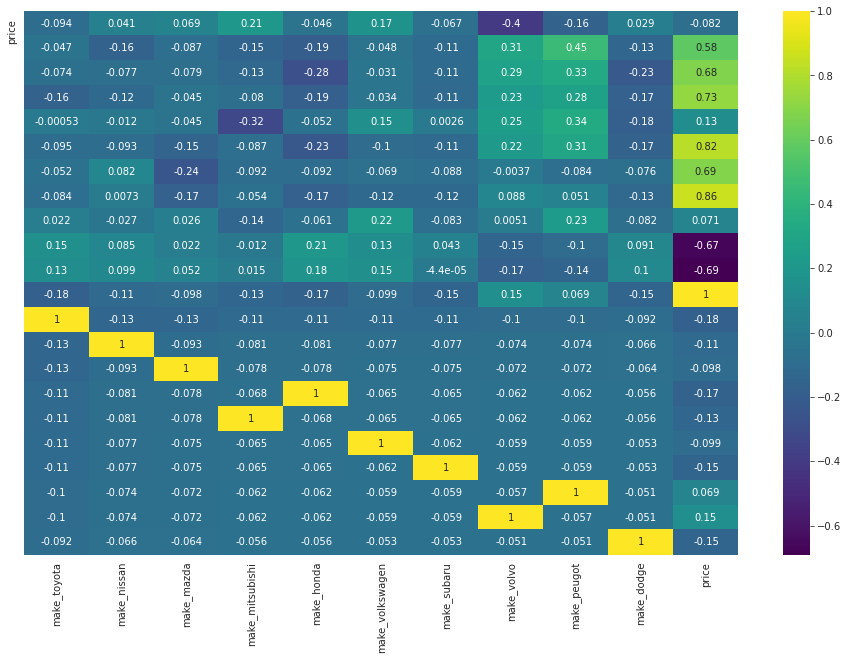

In [294]:
# let examin the numerical correlation of the make factories with the price column
# As here the corelations shows that the names of the factory have a low correlation with the prices of the cars
plt.figure(figsize=(16,10))
sns.heatmap(df.corr()[['make_toyota',
 'make_nissan',
 'make_mazda',
 'make_mitsubishi',
 'make_honda',
 'make_volkswagen',
 'make_subaru',
 'make_volvo',
 'make_peugot',
 'make_dodge','price']],yticklabels=['price'],annot=True,cmap='viridis') 

In [295]:
# We should dropp the makes columns as long as they have a low or negative corr with the price 
#for reducing number of columns for the sake of not having over fitting on the model

df.drop(columns=column_make_factory,axis=1,inplace=True)


In [296]:
df.head(2)

,symboling,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,gas,std,convertible,rwd,front[front],88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,convertible,rwd,front?,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [297]:
# There are 11 vals more to be converted into numeric vals
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   fuel-type          205 non-null    object 
 2   aspiration         205 non-null    object 
 3   body-style         205 non-null    object 
 4   drive-wheels       205 non-null    object 
 5   engine-location    205 non-null    object 
 6   wheel-base         205 non-null    float64
 7   length             205 non-null    float64
 8   width              205 non-null    float64
 9   height             205 non-null    float64
 10  curb-weight        205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  num-of-cylinders   205 non-null    int64  
 13  engine-size        205 non-null    int64  
 14  fuel-system        205 non-null    object 
 15  bore               205 non-null    object 
 16  stroke             205 non

In [298]:
df['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [299]:
df['fuel-type'].isnull().sum()

0

In [300]:
# converting the fuel type if gas put 1 else 0
df['fuel-type']=df['fuel-type'].apply(lambda x: 1 if x=='gas' else 0 )

In [301]:
df.corr()[['price','fuel-type']] # negative corr

,price,fuel-type
symboling,-0.082201,0.194311
fuel-type,-0.110207,1.000000
wheel-base,0.583168,-0.308346
length,0.682986,-0.212679
width,0.728699,-0.233880
height,0.134388,-0.284631
curb-weight,0.820825,-0.217275
num-of-cylinders,0.687770,0.024544
engine-size,0.861752,-0.069594
compression-ratio,0.070990,-0.984356


In [302]:
for col in df.columns:
  if 'fuel' in col:
    print(col)

fuel-type
fuel-system


In [303]:
# very low corr with the price col, so better to drop it
df.drop('fuel-type',inplace=True,axis=1)

In [304]:
# Transforming the body-style to the numeric vals which has a high corr with the perice val.
df['body-style'].value_counts().sort_values(ascending=False).index

Index(['sedan', 'hatchback', 'wagon', 'hardtop', 'convertible'], dtype='object')

In [305]:
body=[label for label in df['body-style'].value_counts().sort_values(ascending=False).index]

In [306]:
body

['sedan', 'hatchback', 'wagon', 'hardtop', 'convertible']

In [307]:
df['body-style'].isnull().sum()

0

In [308]:
one_hot_top_x(df,'body-style',body)

In [309]:
df.head(3)

,symboling,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,body-style_sedan,body-style_hatchback,body-style_wagon,body-style_hardtop,body-style_convertible
0,3,std,convertible,rwd,front[front],88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,1
1,3,std,convertible,rwd,front?,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,1
2,1,std,hatchback,rwd,front?,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0


In [310]:
df.drop('body-style',axis=1,inplace=True)

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   aspiration              205 non-null    object 
 2   drive-wheels            205 non-null    object 
 3   engine-location         205 non-null    object 
 4   wheel-base              205 non-null    float64
 5   length                  205 non-null    float64
 6   width                   205 non-null    float64
 7   height                  205 non-null    float64
 8   curb-weight             205 non-null    int64  
 9   engine-type             205 non-null    object 
 10  num-of-cylinders        205 non-null    int64  
 11  engine-size             205 non-null    int64  
 12  fuel-system             205 non-null    object 
 13  bore                    205 non-null    object 
 14  stroke                  205 non-null    ob

In [312]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [313]:
type(df['aspiration'][0])

str

In [314]:
df['aspiration'].isnull().sum()

0

In [ ]:
df['aspiration']=df['aspiration'].apply(lambda x: 1 if x=='std' else 0)

In [316]:
# While there is a negative correlation between aspiration and price I will drop this col
df.drop('aspiration',axis=1,inplace=True)

In [317]:
df.head(2)

,symboling,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,body-style_sedan,body-style_hatchback,body-style_wagon,body-style_hardtop,body-style_convertible
0,3,rwd,front[front],88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,1
1,3,rwd,front?,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,1


In [318]:
df['drive-wheels'].isnull().sum()

0

In [319]:
df['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [320]:
# converting the drive-wheels val to a numeric val
df['drive-wheels']=df['drive-wheels'].apply(lambda x: 1 if ((x=='fwd') |( x=='4wd')) else 0)

In [321]:
df.corr()[['price','drive-wheels']] # negative correlation

,price,drive-wheels
symboling,-0.082201,0.076381
drive-wheels,-0.632103,1.000000
wheel-base,0.583168,-0.498830
length,0.682986,-0.538370
width,0.728699,-0.511149
height,0.134388,-0.039814
curb-weight,0.820825,-0.669987
num-of-cylinders,0.687770,-0.347350
engine-size,0.861752,-0.565509
compression-ratio,0.070990,-0.105185


In [322]:
# since there is a negative correlation between price and drive-wheel val I will be drop this col
df.drop('drive-wheels',axis=1,inplace=True)

In [323]:
df['engine-location'].value_counts()

front              179
front,               5
front[location]      5
font                 4
front[engine]        4
rear[end]            3
front?               2
front,               1
front,front          1
front[front]         1
Name: engine-location, dtype: int64

In [324]:
# function to conver this col to a numeric val
df['engine-location']= df['engine-location'].apply(lambda x: 0 if x=='rear[end]' in x.lower() else 1)

In [325]:
df['engine-location'].value_counts()

1    202
0      3
Name: engine-location, dtype: int64

In [326]:
df['engine-location'].isnull().sum()

0

In [327]:
df.corr()[['price','engine-location']]   # negative correlation between price col and engine-location

,price,engine-location
symboling,-0.082201,-0.212471
engine-location,-0.331013,1.000000
wheel-base,0.583168,0.187790
length,0.682986,0.050989
width,0.728699,0.051698
height,0.134388,0.106234
curb-weight,0.820825,-0.050468
num-of-cylinders,0.687770,-0.183048
engine-size,0.861752,-0.196826
compression-ratio,0.070990,0.019762


In [328]:
# While there is a negative correlation between price val and engine-location val, I will drop this col.
df.drop('engine-location',axis=1,inplace=True)

In [329]:
df['wheel-base'].isnull().sum()

0

In [330]:
type(df['wheel-base'][54])

numpy.float64

In [331]:
df.corr()[['price','wheel-base']]  # there is a high correlation between price and wheel-base col

,price,wheel-base
symboling,-0.082201,-0.531954
wheel-base,0.583168,1.000000
length,0.682986,0.874587
width,0.728699,0.795144
height,0.134388,0.589435
curb-weight,0.820825,0.776386
num-of-cylinders,0.687770,0.339507
engine-size,0.861752,0.569329
compression-ratio,0.070990,0.249786
city-mpg,-0.667449,-0.470414


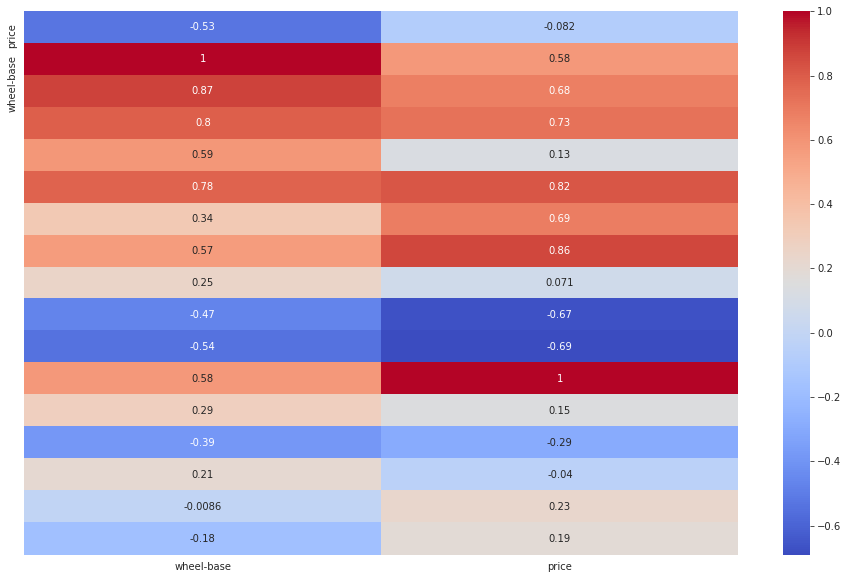

In [332]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr()[['wheel-base','price']],yticklabels=['price','wheel-base'],annot=True,cmap='coolwarm') # .58 high

In [333]:
df.length.isnull().sum()


0

In [334]:
type(df['length'][36])

numpy.float64

In [335]:
df.corr()[['price','length']]  # There is a high correlations with vals in data.

,price,length
symboling,-0.082201,-0.357612
wheel-base,0.583168,0.874587
length,0.682986,1.000000
width,0.728699,0.841118
height,0.134388,0.491029
curb-weight,0.820825,0.877728
num-of-cylinders,0.687770,0.430672
engine-size,0.861752,0.683360
compression-ratio,0.070990,0.158414
city-mpg,-0.667449,-0.670909


In [336]:
df.width.isnull().sum()

0

In [337]:
type(df.width[0])

numpy.float64

In [338]:
df.corr()[['width','price']]  # There is a high corr with the vals

,width,price
symboling,-0.232919,-0.082201
wheel-base,0.795144,0.583168
length,0.841118,0.682986
width,1.000000,0.728699
height,0.279210,0.134388
curb-weight,0.867032,0.820825
num-of-cylinders,0.545007,0.687770
engine-size,0.735433,0.861752
compression-ratio,0.181129,0.070990
city-mpg,-0.642704,-0.667449


In [339]:
df.height.isnull().sum()

0

In [340]:
type(df.height[22])

numpy.float64

In [341]:
df.corr()[['price','height']]  # There is a low correlation with two cols

,price,height
symboling,-0.082201,-0.541038
wheel-base,0.583168,0.589435
length,0.682986,0.491029
width,0.728699,0.279210
height,0.134388,1.000000
curb-weight,0.820825,0.295572
num-of-cylinders,0.687770,-0.013995
engine-size,0.861752,0.067149
compression-ratio,0.070990,0.261214
city-mpg,-0.667449,-0.048640


In [342]:
# While there is a low corr with the two cols I will drop this col
df.drop('height', axis=1,inplace=True)

In [343]:
df['curb-weight'].isnull().sum()

0

In [344]:
type(df['curb-weight'][89])

numpy.int64

In [345]:
df.corr()[['curb-weight','price']]  # There is a very high corr with the two cols.


,curb-weight,price
symboling,-0.227691,-0.082201
wheel-base,0.776386,0.583168
length,0.877728,0.682986
width,0.867032,0.728699
curb-weight,1.000000,0.820825
num-of-cylinders,0.609727,0.687770
engine-size,0.850594,0.861752
compression-ratio,0.151362,0.070990
city-mpg,-0.757414,-0.667449
highway-mpg,-0.797465,-0.690526


In [346]:
df['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [347]:
# converting the string to numeric vals
top_frequent_type=[label for label in df['engine-type'].value_counts().sort_values(ascending=False).head().index]
top_frequent_type

['ohc', 'ohcf', 'ohcv', 'dohc', 'l']

In [348]:
one_hot_top_x(df,'engine-type',top_frequent_type)

In [349]:
df.drop('engine-type',axis=1,inplace=True)

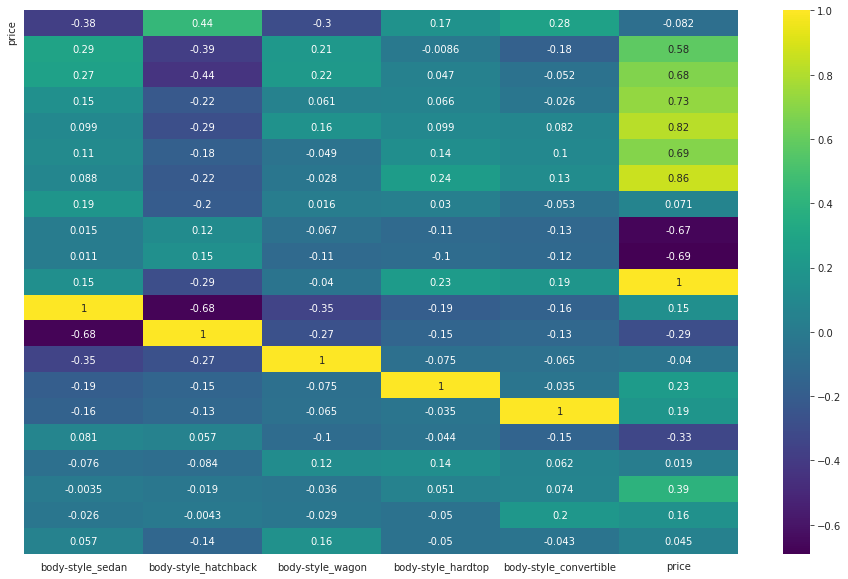

In [350]:
# Visually it is quite abvious that the correlation between body-style and price is very low, so I am going to drop this col
plt.figure(figsize=(16,10))
sns.heatmap(df.corr()[['body-style_sedan','body-style_hatchback','body-style_wagon','body-style_hardtop','body-style_convertible','price']],yticklabels=['price'],cmap='viridis',annot=True)

In [351]:
columns_to_be_droped=[]
for col in df.columns:
  if 'body-style' in col:
    columns_to_be_droped.append(col)

columns_to_be_droped

['body-style_sedan',
 'body-style_hatchback',
 'body-style_wagon',
 'body-style_hardtop',
 'body-style_convertible']

In [352]:
df.drop(columns=columns_to_be_droped,axis=1,inplace=True)

In [353]:
df['fuel-system'].isnull().sum()

0

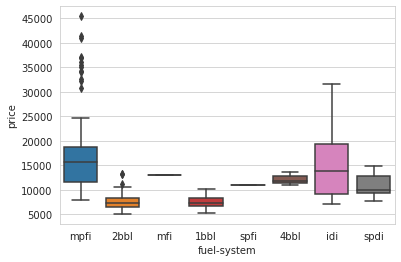

In [354]:
sns.boxplot(x='fuel-system',y='price',data=df)

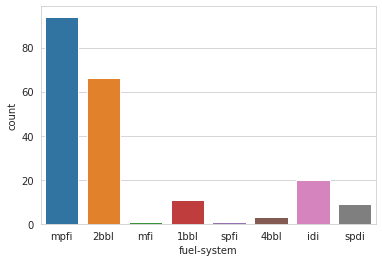

In [355]:
sns.countplot(df['fuel-system'])

In [356]:
df.head(2)

,symboling,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_dohc,engine-type_l
0,3,88.6,168.8,64.1,2548,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,1,0
1,3,88.6,168.8,64.1,2548,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,1,0


In [357]:
# While high-way-mpg and city-mpg is the most important for the fuel system of a car I will drop the fuel system kind val from the data.
df.drop('fuel-system',axis=1,inplace=True)

In [358]:
df.head(2)

,symboling,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_dohc,engine-type_l
0,3,88.6,168.8,64.1,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,1,0
1,3,88.6,168.8,64.1,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,1,0


In [359]:
df.info() # 4 more objects to be converted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   curb-weight        205 non-null    int64  
 5   num-of-cylinders   205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               205 non-null    object 
 8   stroke             205 non-null    object 
 9   compression-ratio  205 non-null    float64
 10  horsepower         205 non-null    object 
 11  peak-rpm           205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    float64
 15  engine-type_ohc    205 non-null    int64  
 16  engine-type_ohcf   205 non

In [360]:
df['bore'].isnull().sum()

0

In [361]:
type(df['bore'][29])

str

In [362]:
df['bore'].value_counts()

3.62    23
3.19    20
3.15    15
2.97    12
3.03    12
3.46     9
3.43     8
3.78     8
3.31     8
2.91     7
3.27     7
3.05     6
3.39     6
3.54     6
3.58     6
3.7      5
3.01     5
?        4
3.35     4
3.74     3
3.17     3
3.59     3
3.63     2
3.33     2
3.94     2
3.8      2
3.24     2
3.47     2
3.5      2
3.13     2
2.68     1
3.61     1
3.76     1
3.6      1
2.92     1
3.08     1
2.99     1
2.54     1
3.34     1
Name: bore, dtype: int64

In [363]:
df['bore']=df['bore'].apply(lambda x: np.nan if x=='?' else float(x))

In [364]:
df['bore'].isnull().sum()

4

In [365]:
df['bore'].fillna(df['bore'].mean(),inplace=True)

In [366]:
df['bore'].isnull().sum()

0

In [367]:
df.corr()[['price','bore']] # There is a high corr with the cols

,price,bore
symboling,-0.082201,-0.130083
wheel-base,0.583168,0.488760
length,0.682986,0.606462
width,0.728699,0.559152
curb-weight,0.820825,0.648485
num-of-cylinders,0.687770,0.231439
engine-size,0.861752,0.583798
bore,0.532300,1.000000
compression-ratio,0.070990,0.005201
city-mpg,-0.667449,-0.584508


In [368]:
df.info()  # There 3 more string types to be converting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   curb-weight        205 non-null    int64  
 5   num-of-cylinders   205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               205 non-null    float64
 8   stroke             205 non-null    object 
 9   compression-ratio  205 non-null    float64
 10  horsepower         205 non-null    object 
 11  peak-rpm           205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    float64
 15  engine-type_ohc    205 non-null    int64  
 16  engine-type_ohcf   205 non

In [369]:
df['stroke'].describe()

count     205
unique     37
top       3.4
freq       20
Name: stroke, dtype: object

In [370]:
df['stroke'].value_counts()

3.4     20
3.23    14
3.03    14
3.15    14
3.39    13
2.64    11
3.29     9
3.35     9
3.46     8
3.19     6
3.07     6
3.41     6
3.11     6
3.27     6
3.5      6
3.58     6
3.64     5
3.52     5
3.86     4
3.47     4
?        4
3.54     4
2.9      3
3.9      3
4.17     2
3.08     2
2.8      2
2.68     2
3.1      2
2.19     2
2.36     1
3.12     1
2.07     1
3.21     1
2.76     1
3.16     1
2.87     1
Name: stroke, dtype: int64

In [371]:
df['stroke']=df['stroke'].apply(lambda x: np.nan if x=='?' else float(x) )

In [372]:
df['stroke'].isnull().sum()

4

In [373]:
# filling the miss vals with the mean of the col
df['stroke'].fillna(df['stroke'].mean(),inplace=True)

In [374]:
df['stroke'].isnull().sum()

0

In [375]:
df.corr()[['price','stroke']] # very low corr with the two cols

,price,stroke
symboling,-0.082201,-0.008689
wheel-base,0.583168,0.160944
length,0.682986,0.129522
width,0.728699,0.182939
curb-weight,0.820825,0.168783
num-of-cylinders,0.687770,0.008151
engine-size,0.861752,0.203094
bore,0.532300,-0.055909
stroke,0.082095,1.000000
compression-ratio,0.070990,0.186105


In [376]:
# while there is a low correlation with the price and stroke, I will drop this col
df.drop('stroke',axis=1,inplace=True)

In [377]:
df['compression-ratio'].value_counts()

9.00     46
9.40     26
8.50     14
9.50     13
9.30     11
8.70      9
9.20      8
8.00      8
7.00      7
21.00     5
7.50      5
9.60      5
23.00     5
8.40      5
8.60      5
21.50     4
7.60      4
10.00     3
22.50     3
8.30      3
8.80      3
7.70      2
8.10      2
9.31      1
21.90     1
22.00     1
11.50     1
9.41      1
10.10     1
9.10      1
22.70     1
7.80      1
Name: compression-ratio, dtype: int64

In [378]:
type(df['compression-ratio'][1])

numpy.float64

In [379]:
df['compression-ratio'].isnull().sum()

0

In [380]:
df.corr()[['compression-ratio','price']] # There is a low corr with the two cols

,compression-ratio,price
symboling,-0.178515,-0.082201
wheel-base,0.249786,0.583168
length,0.158414,0.682986
width,0.181129,0.728699
curb-weight,0.151362,0.820825
num-of-cylinders,-0.020002,0.687770
engine-size,0.028971,0.861752
bore,0.005201,0.532300
compression-ratio,1.000000,0.070990
city-mpg,0.324701,-0.667449


In [381]:
df.head(1)

,symboling,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_dohc,engine-type_l
0,3,88.6,168.8,64.1,2548,4,130,3.47,9.0,111,5000,21,27,13495.0,0,0,0,1,0


In [382]:
df.drop('compression-ratio',axis=1,inplace=True)

In [383]:
df['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
88      6
101     6
114     6
160     6
62      6
145     5
97      5
76      5
82      5
84      5
102     5
92      4
111     4
123     4
86      4
182     3
73      3
207     3
90      3
121     3
85      3
152     3
?       2
156     2
56      2
176     2
155     2
162     2
94      2
161     2
184     2
52      2
112     2
100     2
140     1
175     1
142     1
115     1
55      1
48      1
58      1
64      1
78      1
135     1
72      1
143     1
262     1
200     1
288     1
60      1
154     1
106     1
134     1
120     1
Name: horsepower, dtype: int64

In [384]:
df['horsepower']=df['horsepower'].apply(lambda x: np.nan if x=='?' else int(x))

In [385]:
df['horsepower'].isnull().sum()

2

In [386]:
df['horsepower']=df['horsepower'].fillna(df['horsepower'].mean())

In [387]:
df['horsepower'].isnull().sum()

0

In [388]:
df.corr()[['price','horsepower']] # There is a high corr with the two cols

,price,horsepower
symboling,-0.082201,0.071389
wheel-base,0.583168,0.351957
length,0.682986,0.554434
width,0.728699,0.642195
curb-weight,0.820825,0.750968
num-of-cylinders,0.687770,0.691208
engine-size,0.861752,0.810713
bore,0.532300,0.575737
horsepower,0.757917,1.000000
city-mpg,-0.667449,-0.803162


In [389]:
df['peak-rpm'].value_counts()

5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
5250     7
5800     7
4500     7
4150     5
4200     5
4350     4
4750     4
5100     3
5900     3
4400     3
4250     3
?        2
6600     2
4900     1
4650     1
5300     1
5600     1
5750     1
Name: peak-rpm, dtype: int64

In [390]:
df['peak-rpm']=df['peak-rpm'].apply(lambda x: np.nan if x=='?' else int(x))

In [391]:
df['peak-rpm'].fillna(df['peak-rpm'].mean(),inplace=True)

In [392]:
df['peak-rpm'].isnull().sum()

0

In [393]:
df.corr()[['price','peak-rpm']] # negative corr with the two cols

,price,peak-rpm
symboling,-0.082201,0.273679
wheel-base,0.583168,-0.360704
length,0.682986,-0.287031
width,0.728699,-0.219859
curb-weight,0.820825,-0.266283
num-of-cylinders,0.687770,-0.124358
engine-size,0.861752,-0.244599
bore,0.532300,-0.254761
horsepower,0.757917,0.130971
peak-rpm,-0.100854,1.000000


In [394]:
df.drop('peak-rpm',axis=1,inplace=True)

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   wheel-base        205 non-null    float64
 2   length            205 non-null    float64
 3   width             205 non-null    float64
 4   curb-weight       205 non-null    int64  
 5   num-of-cylinders  205 non-null    int64  
 6   engine-size       205 non-null    int64  
 7   bore              205 non-null    float64
 8   horsepower        205 non-null    float64
 9   city-mpg          205 non-null    int64  
 10  highway-mpg       205 non-null    int64  
 11  price             205 non-null    float64
 12  engine-type_ohc   205 non-null    int64  
 13  engine-type_ohcf  205 non-null    int64  
 14  engine-type_ohcv  205 non-null    int64  
 15  engine-type_dohc  205 non-null    int64  
 16  engine-type_l     205 non-null    int64  
dt

<h3> Finding the Correlations </h3>

In [396]:
columns_of_engine_type=[]
for col in df.columns:
  if 'engine-type_' in col:
    columns_of_engine_type.append(col)
columns_of_engine_type

['engine-type_ohc',
 'engine-type_ohcf',
 'engine-type_ohcv',
 'engine-type_dohc',
 'engine-type_l']

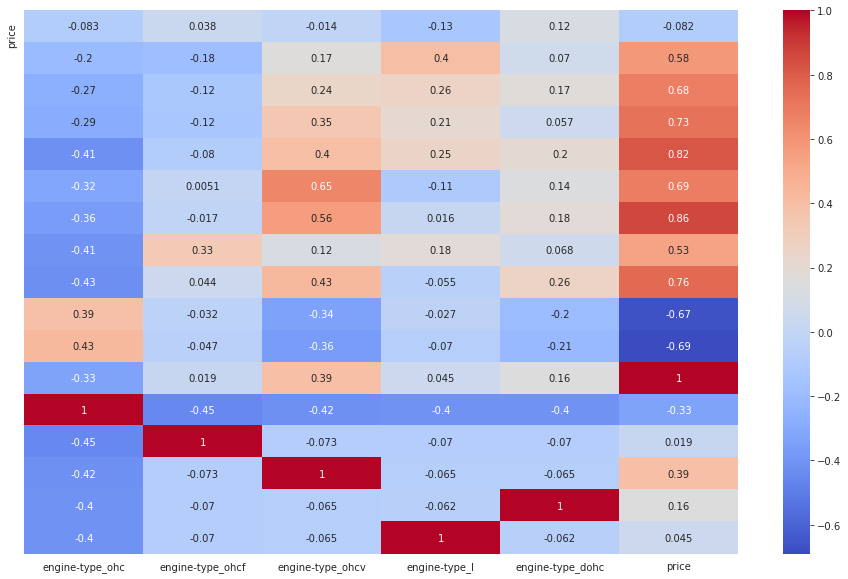

In [397]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr()[['engine-type_ohc',
 'engine-type_ohcf',
 'engine-type_ohcv',
 'engine-type_l',
 'engine-type_dohc','price']],annot=True,cmap='coolwarm',yticklabels=['price'])

In [398]:
df.corr()[['engine-type_ohc',
 'engine-type_ohcf',
 'engine-type_ohcv',
 'engine-type_l',
 'engine-type_dohc','price']]

,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_l,engine-type_dohc,price
symboling,-0.082855,0.037513,-0.013597,-0.133979,0.116925,-0.082201
wheel-base,-0.204037,-0.183195,0.166152,0.399603,0.069601,0.583168
length,-0.274413,-0.118320,0.244053,0.261715,0.171218,0.682986
width,-0.286211,-0.124446,0.348869,0.210771,0.057351,0.728699
curb-weight,-0.413293,-0.080295,0.400878,0.250124,0.202237,0.820825
num-of-cylinders,-0.316184,0.005085,0.650738,-0.107265,0.143270,0.687770
engine-size,-0.363334,-0.016508,0.562403,0.016063,0.182633,0.861752
bore,-0.410354,0.326803,0.119514,0.181733,0.067909,0.532300
horsepower,-0.425697,0.043789,0.430894,-0.055383,0.264033,0.757917
city-mpg,0.391236,-0.032413,-0.336926,-0.027491,-0.199427,-0.667449


In [399]:
# it seems just the engine-type_ohcv has a 40% corr with the price val, I will drop the rest of the columns
df.drop(columns=['engine-type_ohc',
 'engine-type_ohcf',
 'engine-type_l',
 'engine-type_dohc'],axis=1,inplace=True)

In [400]:
df.corr()[['symboling','price']] # low corr value ~ -0.082

,symboling,price
symboling,1.000000,-0.082201
wheel-base,-0.531954,0.583168
length,-0.357612,0.682986
width,-0.232919,0.728699
curb-weight,-0.227691,0.820825
num-of-cylinders,-0.113129,0.687770
engine-size,-0.105790,0.861752
bore,-0.130083,0.532300
horsepower,0.071389,0.757917
city-mpg,-0.035823,-0.667449


In [401]:
df.drop('symboling',inplace=True,axis=1)

In [402]:
df.info() # All the columns are numeric with the high correlation with the price col, let double check the data closely.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheel-base        205 non-null    float64
 1   length            205 non-null    float64
 2   width             205 non-null    float64
 3   curb-weight       205 non-null    int64  
 4   num-of-cylinders  205 non-null    int64  
 5   engine-size       205 non-null    int64  
 6   bore              205 non-null    float64
 7   horsepower        205 non-null    float64
 8   city-mpg          205 non-null    int64  
 9   highway-mpg       205 non-null    int64  
 10  price             205 non-null    float64
 11  engine-type_ohcv  205 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 19.3 KB


<h2> Correlation of Variables </h2>
<h3> Note: The blue values are very important for this data because of a well car has all the fit features plus less consumption od gas feature. </h3>

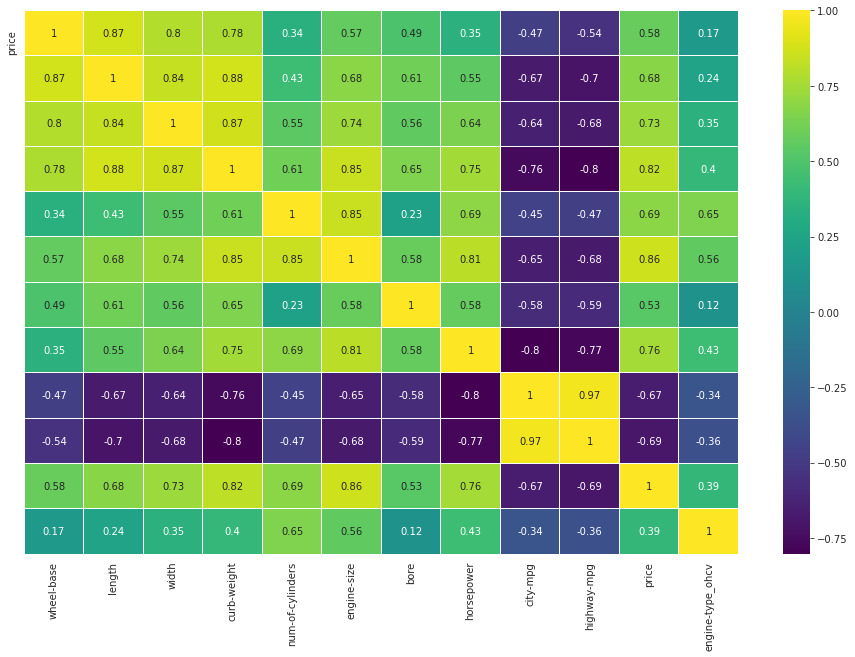

In [403]:


plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis',yticklabels=['price'],linecolor='white',linewidth=.08)

<h2> Exploratory Data Analysis<h2>
<h3>All numeric Data clean data</h3>


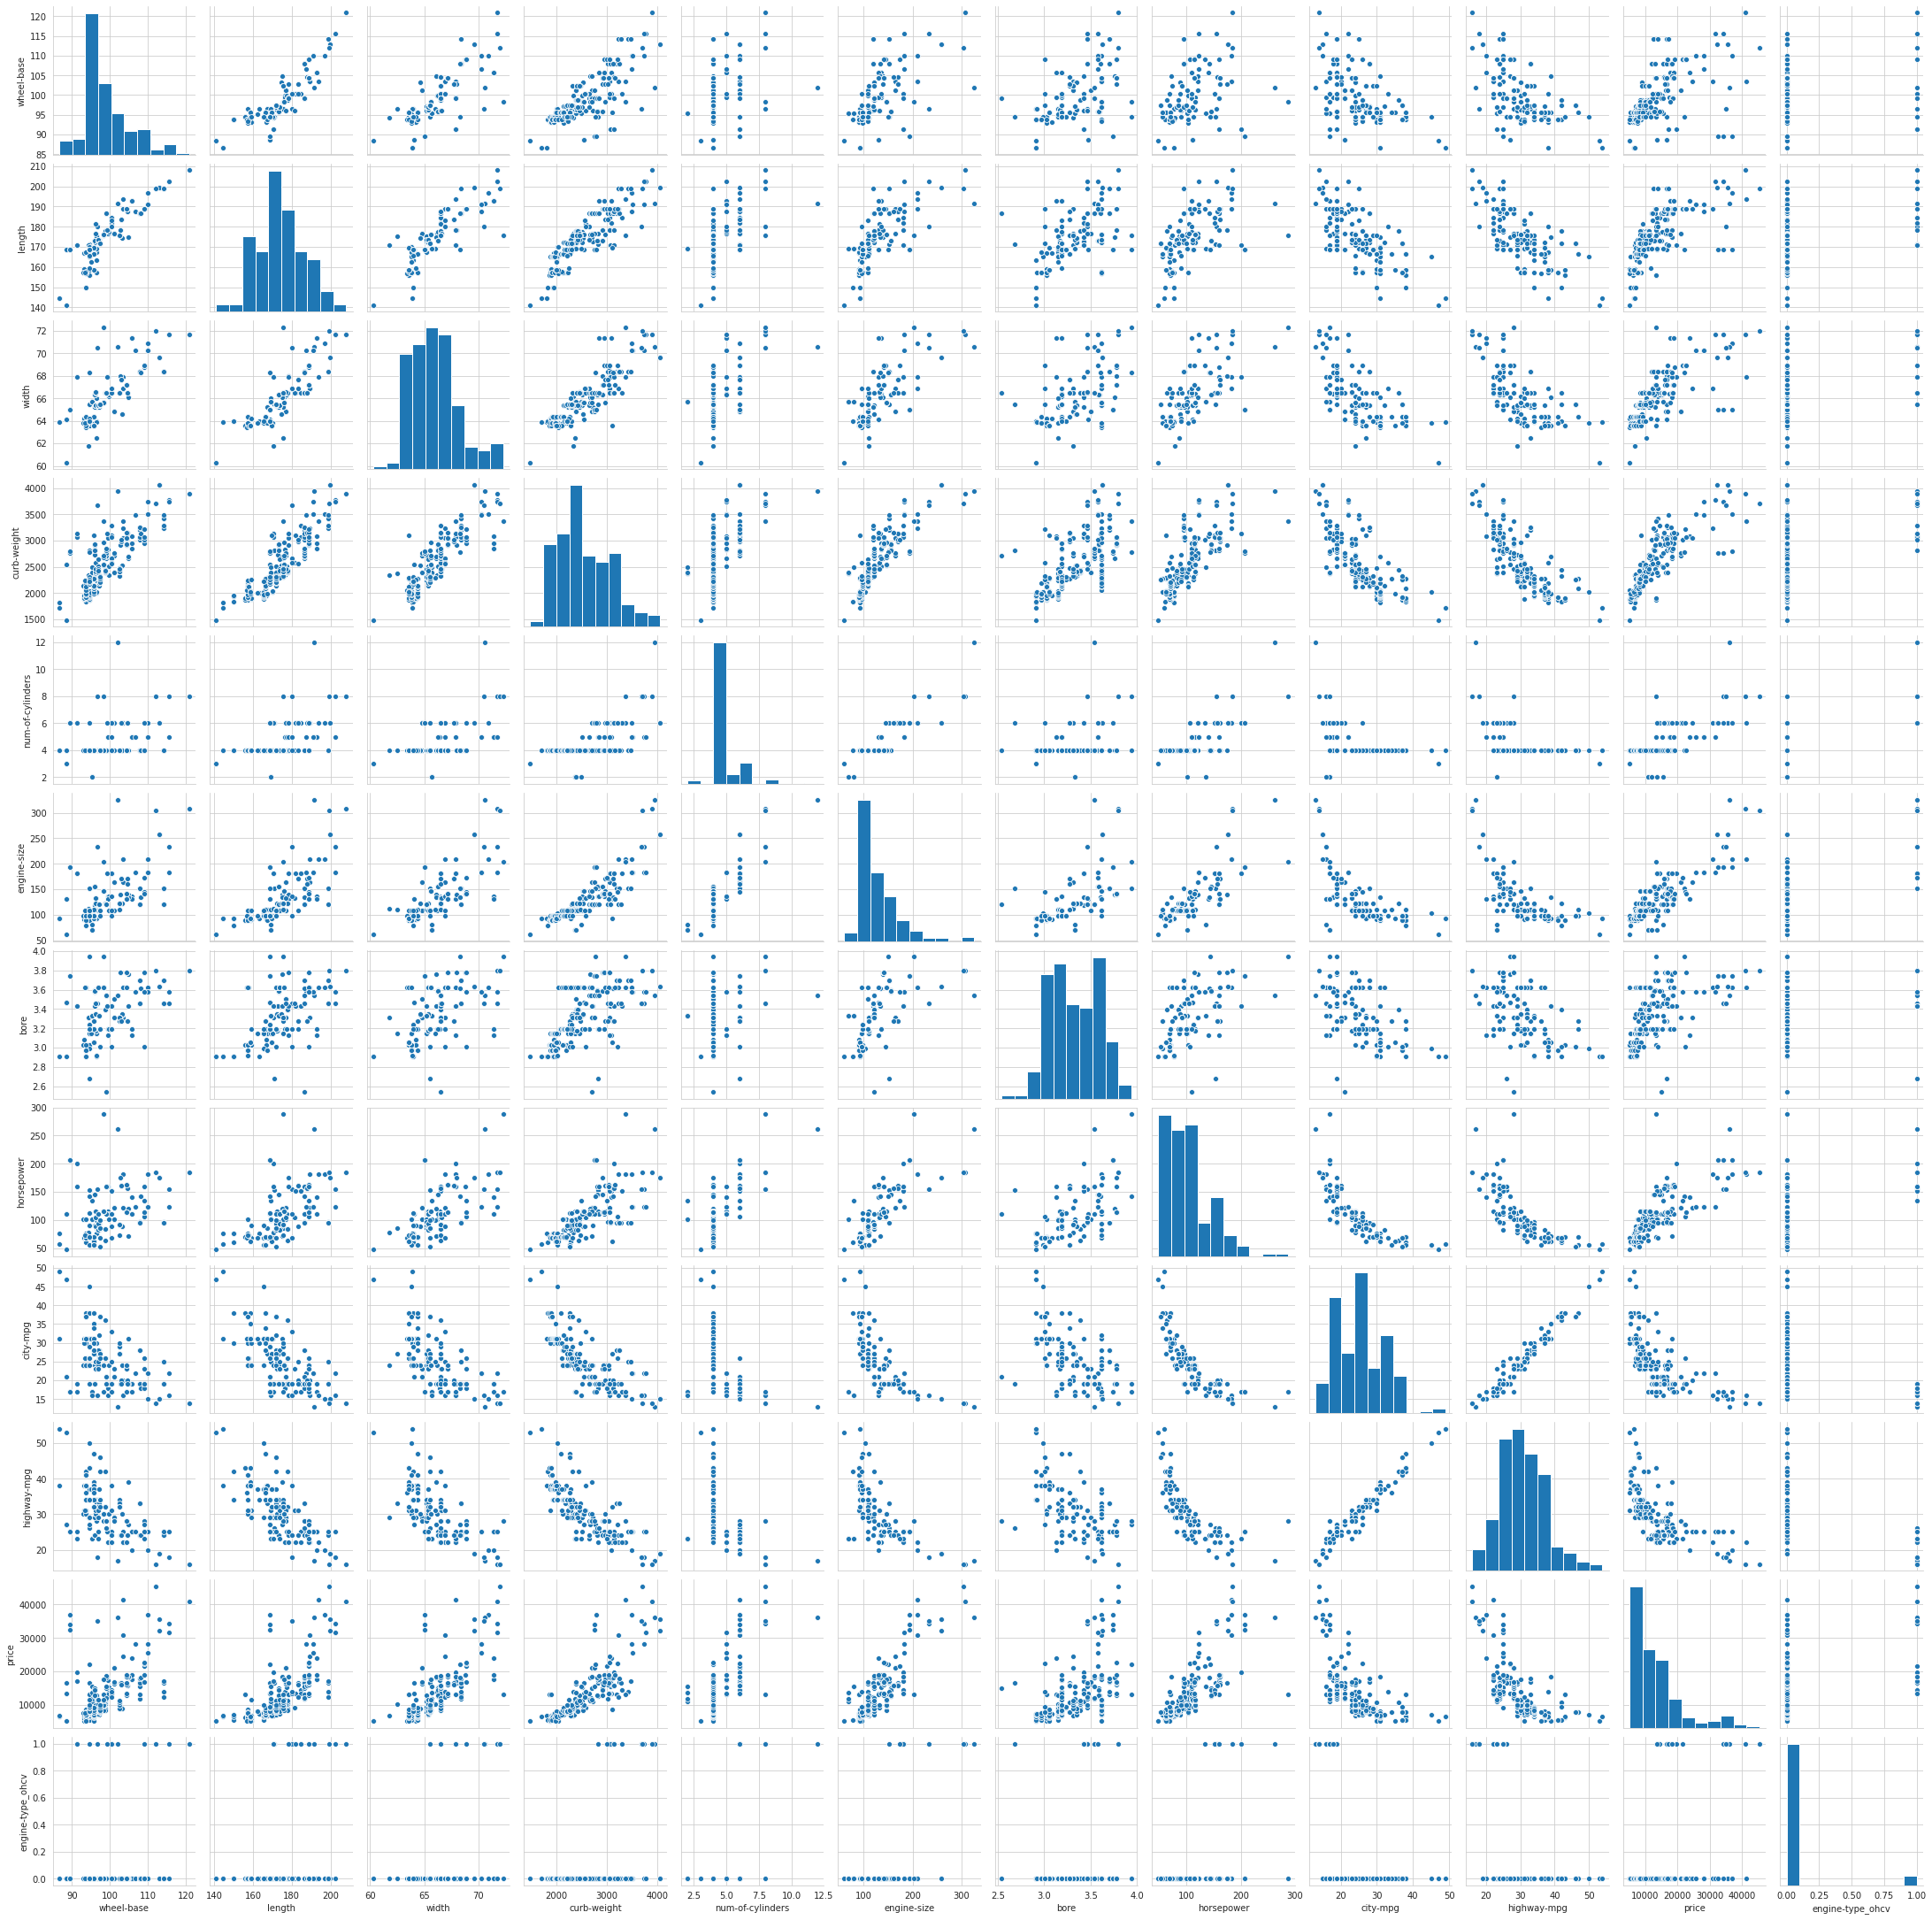

In [404]:
sns.pairplot(df)

<h3> Clean data all numeric with outliers, without NaN values </h3>

In [405]:
# Data has become numeric without null vals
print('DATA INFO-->')
print()
print(df.info())
print('*' * 50)
print('DATA TYPE-->')
print()
print(df.dtypes)
print('*' * 50)
print('DATA IS NULL VALUES -->')
print()
print(df.isnull().sum())
print('*' *50)
print('Data Shape-->')
print(df.shape)
print('*'* 50)
print('Price Column shape-->')
print(df['price'].shape)

DATA INFO-->

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheel-base        205 non-null    float64
 1   length            205 non-null    float64
 2   width             205 non-null    float64
 3   curb-weight       205 non-null    int64  
 4   num-of-cylinders  205 non-null    int64  
 5   engine-size       205 non-null    int64  
 6   bore              205 non-null    float64
 7   horsepower        205 non-null    float64
 8   city-mpg          205 non-null    int64  
 9   highway-mpg       205 non-null    int64  
 10  price             205 non-null    float64
 11  engine-type_ohcv  205 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 19.3 KB
None
**************************************************
DATA TYPE-->

wheel-base          float64
length              float64
width               float64
curb-weight       

<h2> Exploratory Data Analysis </h2>
<h3> Data after clening, needs to be scaled, it is not normalized as shown</h3>


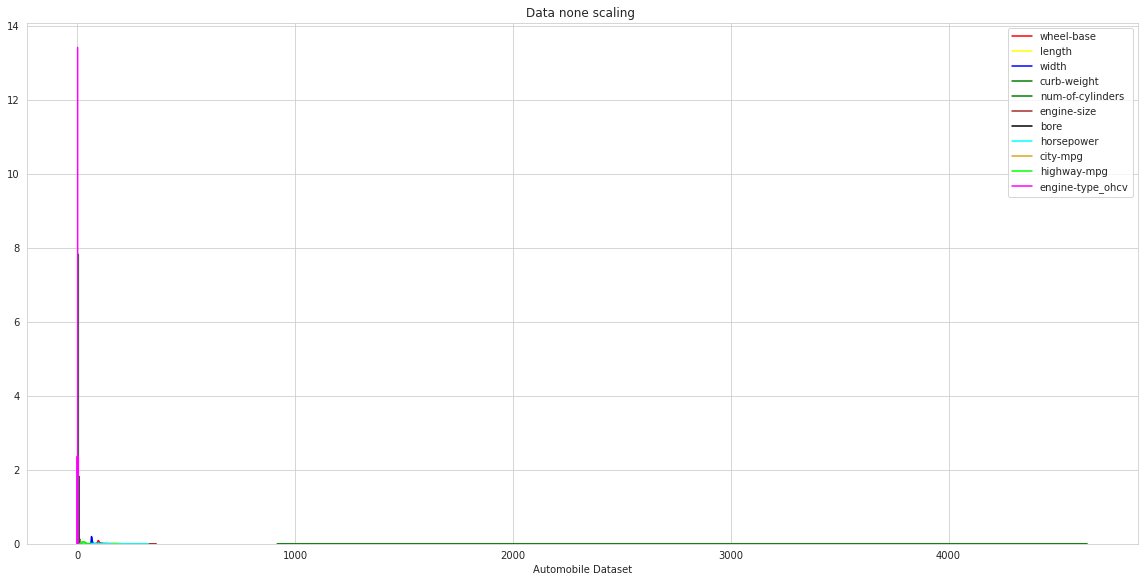

In [406]:
plt.figure(figsize=(16,8))
sns.set_style('whitegrid')
sns.distplot(df['wheel-base'],bins=30,hist=False,color='red',label='wheel-base')
sns.distplot(df['length'],bins=30,hist=False,color='yellow',label='length')
sns.distplot(df['width'],bins=30,hist=False,color='blue',label='width')
sns.distplot(df['curb-weight'],bins=30,hist=False,color='green',label='curb-weight')
sns.distplot(df['num-of-cylinders'],bins=30,hist=False,color='green',label='num-of-cylinders')
sns.distplot(df['engine-size'],bins=30,hist=False,color='brown',label='engine-size')
sns.distplot(df['bore'],bins=30,hist=False,color='black',label='bore')
sns.distplot(df['horsepower'],bins=30,hist=False,color='cyan',label='horsepower')
sns.distplot(df['city-mpg'],bins=30,hist=False,color='goldenrod',label='city-mpg')
sns.distplot(df['highway-mpg'],bins=30,hist=False,color='lime',label='highway-mpg')
sns.distplot(df['engine-type_ohcv'],bins=30,hist=False,color='magenta',label='engine-type_ohcv')
plt.tight_layout()
plt.title('Data none scaling ')
plt.xlabel('Automobile Dataset')
plt.legend()

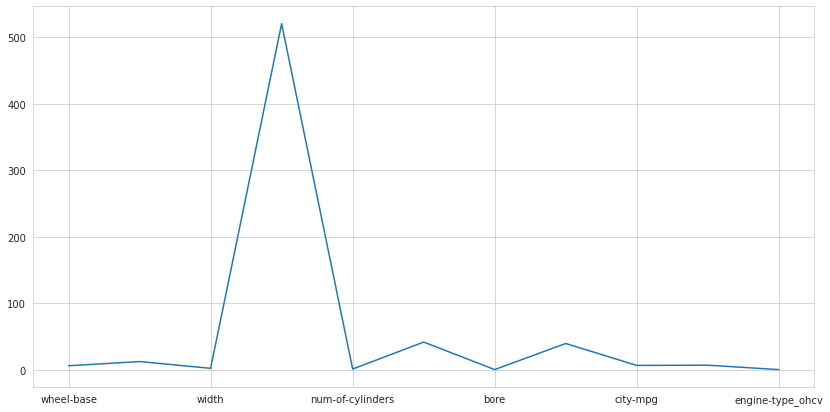

In [408]:
# standard deviation plot
plt.figure(figsize=(14,7))
df.drop('price',axis=1).std().plot()

<h2> Scaling Data </h2>

In [409]:
from sklearn.preprocessing import StandardScaler

In [410]:
scaler=StandardScaler()

In [411]:
data_scaled=scaler.fit_transform(df.drop('price',axis=1))

In [412]:
scaled_df=pd.DataFrame(data_scaled,columns=['wheel-base', 'length', 'width', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'horsepower', 'city-mpg', 'highway-mpg','engine-type_ohcv'])

In [413]:
scaled_df.head()

,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,city-mpg,highway-mpg,engine-type_ohcv
0,-1.690772,-0.426521,-0.844782,-0.014566,-0.352887,0.074449,0.519089,0.171065,-0.646553,-0.546059,-0.260208
1,-1.690772,-0.426521,-0.844782,-0.014566,-0.352887,0.074449,0.519089,0.171065,-0.646553,-0.546059,-0.260208
2,-0.708596,-0.231513,-0.190566,0.514882,1.502032,0.604046,-2.404862,1.261807,-0.953012,-0.691627,3.843076
3,0.173698,0.207256,0.136542,-0.420797,-0.352887,-0.431076,-0.517248,-0.057230,-0.186865,-0.109354,-0.260208
4,0.107110,0.207256,0.230001,0.516807,0.574572,0.218885,-0.517248,0.272529,-1.106241,-1.273900,-0.260208


<h2> Exploratory Data Analysis </h2>
<h3> There are lots of outliers, they are noisy and they should be removed </h3>

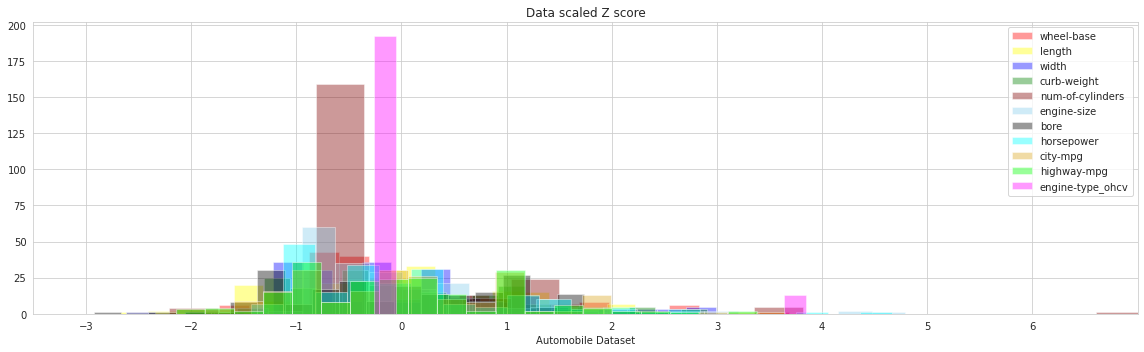

In [414]:
plt.figure(figsize=(16,5))
sns.set_style('whitegrid')
sns.distplot(scaled_df['wheel-base'],bins=20,color='red',label='wheel-base',kde=False,)
sns.distplot(scaled_df['length'],bins=20,color='yellow',label='length',kde=False)
sns.distplot(scaled_df['width'],bins=20,color='blue',label='width',kde=False)
sns.distplot(scaled_df['curb-weight'],bins=20,color='green',label='curb-weight',kde=False)
sns.distplot(scaled_df['num-of-cylinders'],bins=20,color='maroon',label='num-of-cylinders',kde=False)
sns.distplot(scaled_df['engine-size'],bins=20,color='skyblue',label='engine-size',kde=False)
sns.distplot(scaled_df['bore'],bins=20,color='black',label='bore',kde=False)
sns.distplot(scaled_df['horsepower'],bins=20,color='cyan',label='horsepower',kde=False)
sns.distplot(scaled_df['city-mpg'],bins=20,color='goldenrod',label='city-mpg',kde=False)
sns.distplot(scaled_df['highway-mpg'],bins=20,color='lime',label='highway-mpg',kde=False)
sns.distplot(scaled_df['engine-type_ohcv'],bins=20,color='magenta',label='engine-type_ohcv',kde=False)
plt.title('Data scaled Z score')
plt.xlabel('Automobile Dataset')
plt.xlim(-3.5,7)
plt.xticks(np.arange(-3,7,1))
plt.tight_layout()
plt.legend()

<h3> Removing the Z score less than 2 and removing the outliers as well with scaling methods.</h3>

In [415]:
from scipy import stats

In [416]:
z=np.abs(stats.zscore(scaled_df))

In [431]:
np.where(z>2)

(array([  2,   2,   6,   7,   8,  17,  18,  18,  18,  18,  18,  30,  30,
         30,  30,  31,  31,  47,  47,  47,  47,  48,  48,  48,  48,  49,
         49,  49,  49,  49,  49,  49,  55,  56,  57,  58,  67,  68,  68,
         69,  70,  70,  70,  70,  71,  71,  71,  71,  71,  71,  71,  72,
         72,  72,  72,  72,  73,  73,  73,  73,  73,  73,  73,  73,  73,
         74,  74,  74,  74,  74,  74,  74,  74,  74,  90,  90, 101, 102,
        103, 104, 105, 105, 106, 109, 109, 110, 110, 113, 113, 114, 114,
        125, 126, 127, 128, 129, 129, 129, 129, 134, 159, 160, 182, 184,
        202]),
 array([ 6, 10,  2,  2,  2,  2,  1,  2,  3,  8,  9,  0,  1,  8,  9,  0,  1,
         0,  1,  3,  5,  0,  1,  3,  5,  2,  3,  4,  5,  7,  9, 10,  4,  4,
         4,  4,  2,  2,  3,  2,  0,  1,  2,  3,  0,  1,  2,  3,  4,  5, 10,
         2,  3,  4,  5, 10,  0,  1,  2,  3,  4,  5,  7,  9, 10,  0,  1,  2,
         3,  4,  5,  7,  9, 10,  8,  9, 10, 10, 10, 10,  7, 10, 10,  0,  1,
         0,  1,  0,  

In [418]:
# This is an outlier.
z[2][6]


2.4048623494416956

In [433]:
scaled_df_removed_outliers=scaled_df[(z < 2).all(axis=1)]

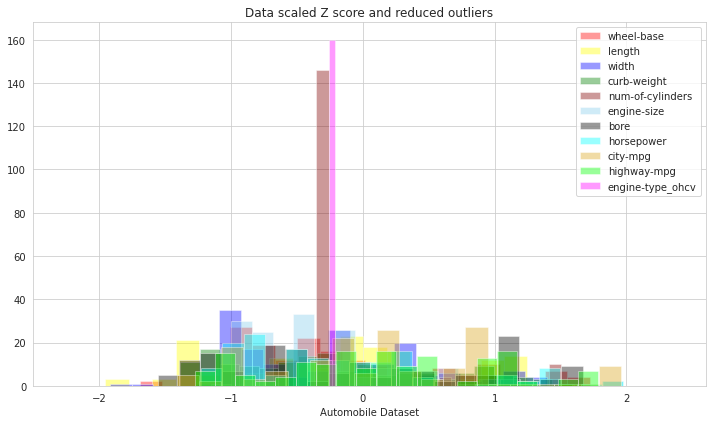

In [443]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.distplot(scaled_df_removed_outliers['wheel-base'],bins=20,color='red',label='wheel-base',kde=False,)
sns.distplot(scaled_df_removed_outliers['length'],bins=20,color='yellow',label='length',kde=False)
sns.distplot(scaled_df_removed_outliers['width'],bins=20,color='blue',label='width',kde=False)
sns.distplot(scaled_df_removed_outliers['curb-weight'],bins=20,color='green',label='curb-weight',kde=False)
sns.distplot(scaled_df_removed_outliers['num-of-cylinders'],bins=20,color='maroon',label='num-of-cylinders',kde=False)
sns.distplot(scaled_df_removed_outliers['engine-size'],bins=20,color='skyblue',label='engine-size',kde=False)
sns.distplot(scaled_df_removed_outliers['bore'],bins=20,color='black',label='bore',kde=False)
sns.distplot(scaled_df_removed_outliers['horsepower'],bins=20,color='cyan',label='horsepower',kde=False)
sns.distplot(scaled_df_removed_outliers['city-mpg'],bins=20,color='goldenrod',label='city-mpg',kde=False)
sns.distplot(scaled_df_removed_outliers['highway-mpg'],bins=20,color='lime',label='highway-mpg',kde=False)
sns.distplot(scaled_df_removed_outliers['engine-type_ohcv'],bins=20,color='magenta',label='engine-type_ohcv',kde=False)
plt.title('Data scaled Z score and reduced outliers')
plt.xlabel('Automobile Dataset')
plt.xlim(-2.5,2.6)
plt.xticks(np.arange(-2,3,1))
plt.tight_layout()
plt.legend()

In [444]:
scaled_df_removed_outliers.columns

Index(['wheel-base', 'length', 'width', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'horsepower', 'city-mpg', 'highway-mpg',
       'engine-type_ohcv'],
      dtype='object')

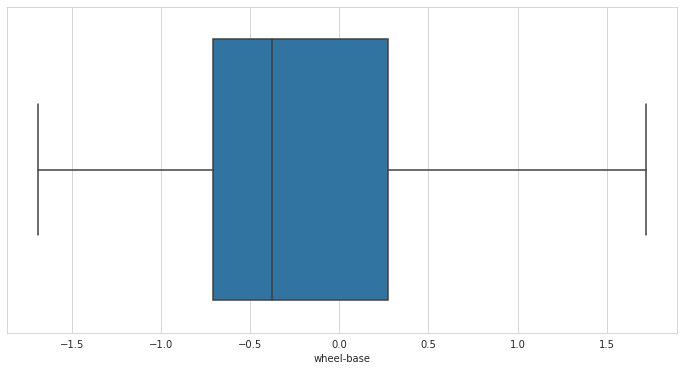

In [448]:
plt.figure(figsize=(12,6))

sns.boxplot(scaled_df_removed_outliers['wheel-base'],data=scaled_df_removed_outliers)



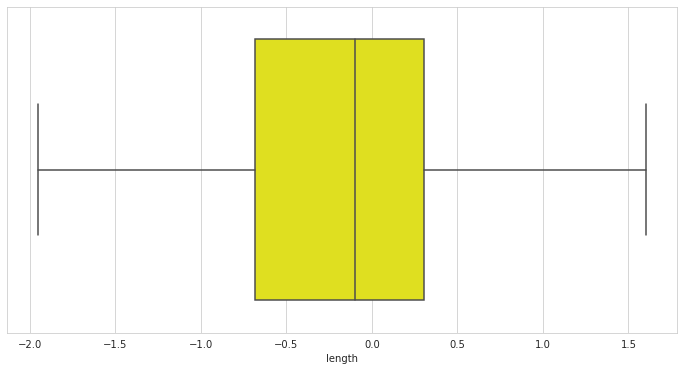

In [449]:
plt.figure(figsize=(12,6))
sns.boxplot(scaled_df_removed_outliers['length'],data=scaled_df_removed_outliers,color='yellow')




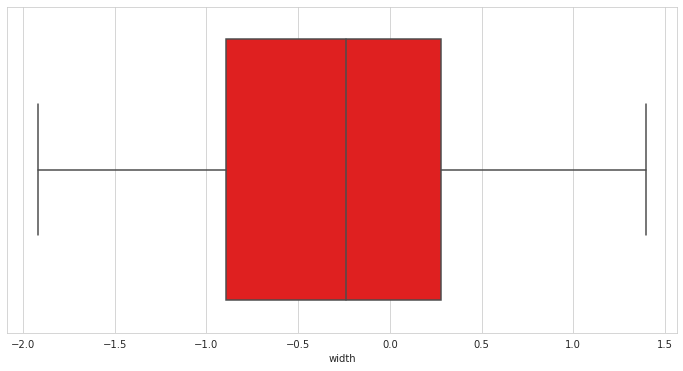

In [451]:
plt.figure(figsize=(12,6))

sns.boxplot(scaled_df_removed_outliers['width'],data=scaled_df_removed_outliers,color='red')


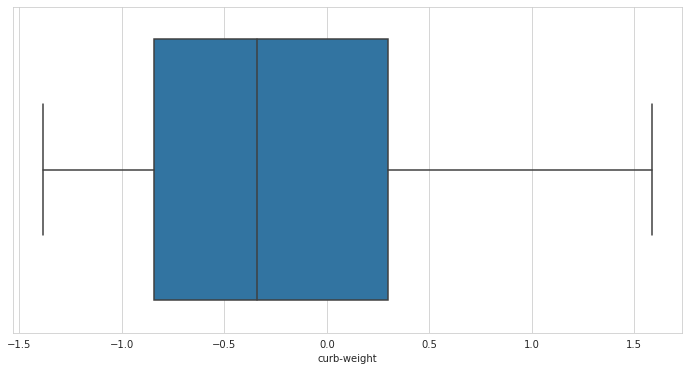

In [452]:
plt.figure(figsize=(12,6))
sns.boxplot(scaled_df_removed_outliers['curb-weight'],data=scaled_df_removed_outliers)

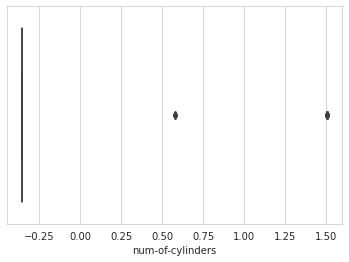

In [454]:
# It seems after standardized this col it behaves with outliers also, I will drop this col as well.
sns.boxplot(scaled_df_removed_outliers['num-of-cylinders'],data=scaled_df_removed_outliers)

In [455]:
scaled_df_removed_outliers.drop('num-of-cylinders',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


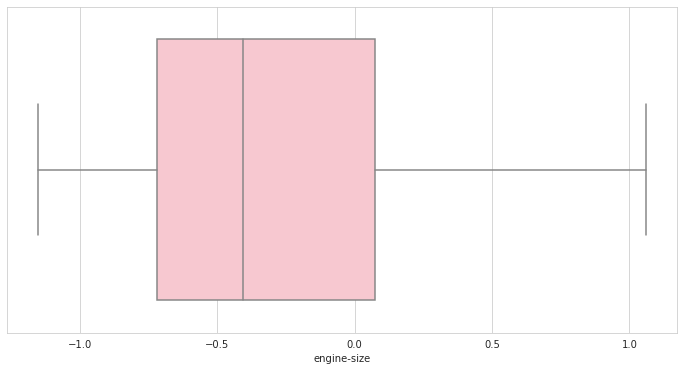

In [471]:
plt.figure(figsize=(12,6))
sns.boxplot(scaled_df_removed_outliers['engine-size'],data=scaled_df_removed_outliers,color='pink')


In [465]:
# There remains two outliers in this col, as long as it is just 2/205 *100= 0.97, which is almost 1%, so I will drop it.
scaled_df_removed_outliers[scaled_df_removed_outliers['engine-size'] >1.9]

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg,engine-type_ohcv
15,0.789639,1.214799,0.463650,1.298465,1.976184,1.07427,1.972058,-1.4127,-1.2739,-0.260208
16,0.789639,1.604816,0.930947,1.587255,1.976184,1.07427,1.972058,-1.4127,-1.2739,-0.260208


In [467]:
scaled_df_removed_outliers.drop(index=[15,16],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


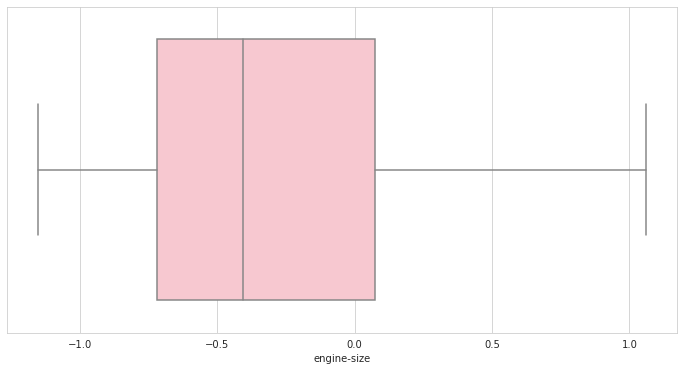

In [469]:
plt.figure(figsize=(12,6))
sns.boxplot(scaled_df_removed_outliers['engine-size'],data=scaled_df_removed_outliers,color='pink')



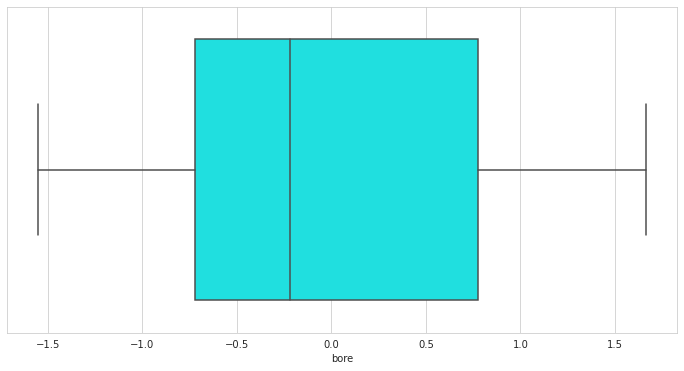

In [472]:
plt.figure(figsize=(12,6))
sns.boxplot(scaled_df_removed_outliers['bore'],data=scaled_df_removed_outliers,color='cyan')

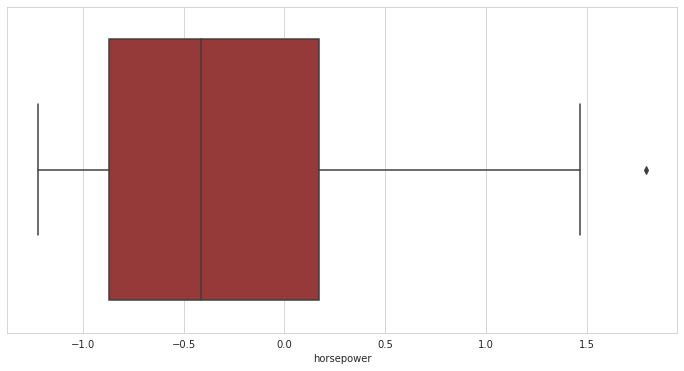

In [474]:
# There is an outlier in the data let remove that
plt.figure(figsize=(12,6))
sns.boxplot(scaled_df_removed_outliers['horsepower'],data=scaled_df_removed_outliers,color='brown')

In [476]:
scaled_df_removed_outliers[scaled_df_removed_outliers['horsepower'] >1.5]

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg,engine-type_ohcv
75,0.656462,0.353512,0.977677,0.68238,0.315175,1.666463,1.794495,-0.953012,-0.982764,-0.260208


In [478]:
# This horse power is just les than .5 % of data let drop that
scaled_df_removed_outliers.drop(index=[75],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


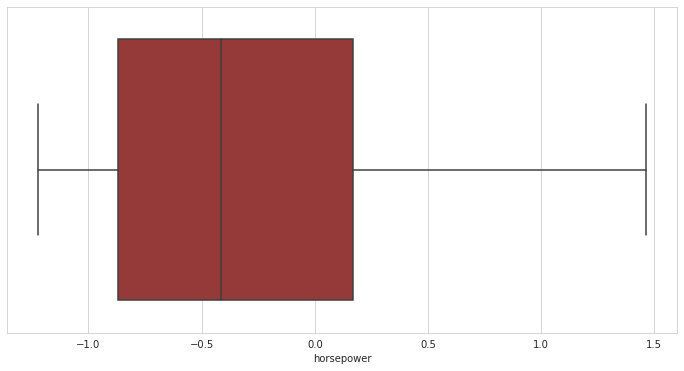

In [479]:
# clean col
plt.figure(figsize=(12,6))
sns.boxplot(scaled_df_removed_outliers['horsepower'],data=scaled_df_removed_outliers,color='brown')

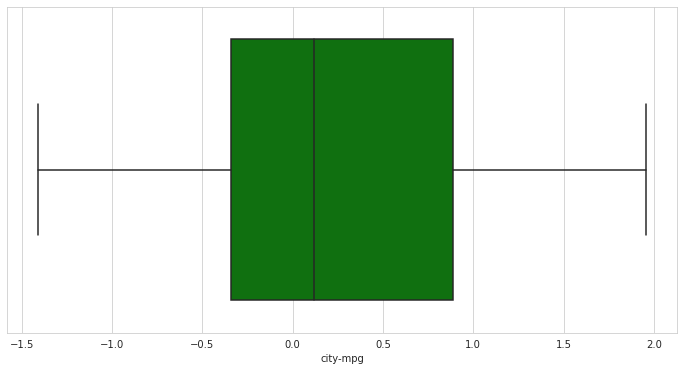

In [480]:
plt.figure(figsize=(12,6))
sns.boxplot(scaled_df_removed_outliers['city-mpg'],data=scaled_df_removed_outliers,color='green')

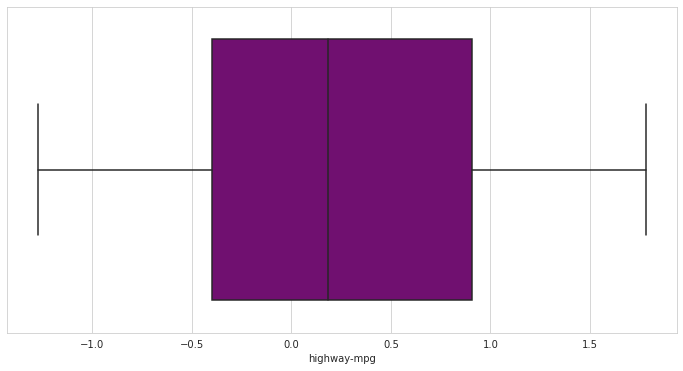

In [481]:
plt.figure(figsize=(12,6))
sns.boxplot(scaled_df_removed_outliers['highway-mpg'],data=scaled_df_removed_outliers,color='purple')

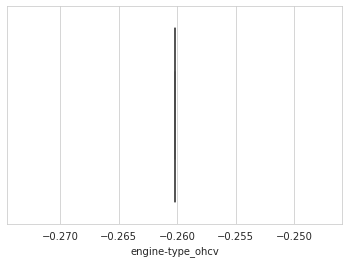

In [482]:
# since this col is behaved unregularity for this data, let drop that.
sns.boxplot(scaled_df_removed_outliers['engine-type_ohcv'],data=scaled_df_removed_outliers,color='orange')

In [483]:
scaled_df_removed_outliers.drop('engine-type_ohcv',inplace=True,axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<h2> Exploratory Data Analysis </h2>
<h3> After taking care of the outliers and cleaning all the columns. This is a final data looks like to be exploring<h3>

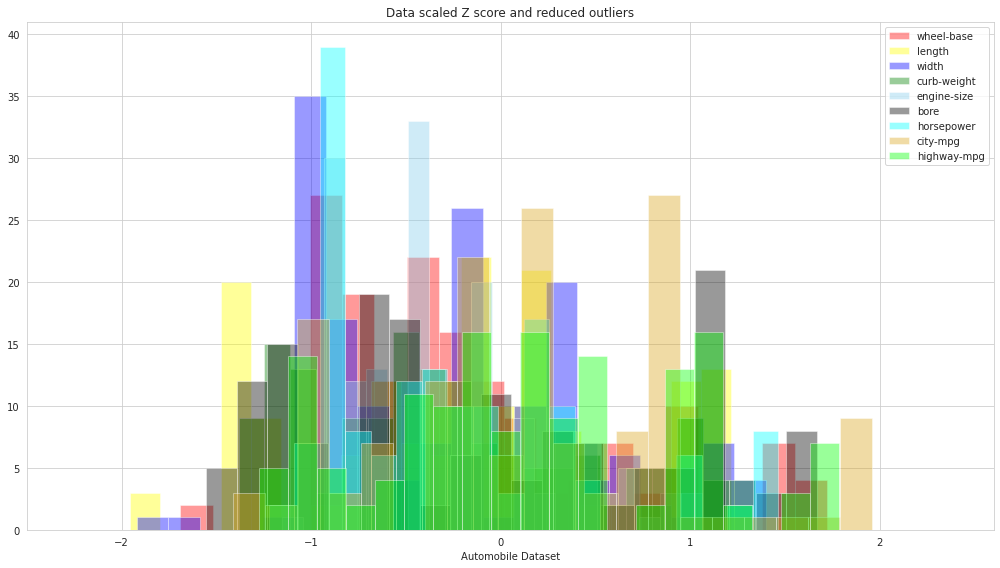

In [489]:
# This is my final data looks like, which it seems, it needs more feature cleanings 
# This data is right skewed, also
plt.figure(figsize=(14,8))
sns.set_style('whitegrid')
sns.distplot(scaled_df_removed_outliers['wheel-base'],bins=20,color='red',label='wheel-base',kde=False,)
sns.distplot(scaled_df_removed_outliers['length'],bins=20,color='yellow',label='length',kde=False)
sns.distplot(scaled_df_removed_outliers['width'],bins=20,color='blue',label='width',kde=False)
sns.distplot(scaled_df_removed_outliers['curb-weight'],bins=20,color='green',label='curb-weight',kde=False)
#sns.distplot(scaled_df_removed_outliers['num-of-cylinders'],bins=20,color='maroon',label='num-of-cylinders',kde=False)
sns.distplot(scaled_df_removed_outliers['engine-size'],bins=20,color='skyblue',label='engine-size',kde=False)
sns.distplot(scaled_df_removed_outliers['bore'],bins=20,color='black',label='bore',kde=False)
sns.distplot(scaled_df_removed_outliers['horsepower'],bins=20,color='cyan',label='horsepower',kde=False)
sns.distplot(scaled_df_removed_outliers['city-mpg'],bins=20,color='goldenrod',label='city-mpg',kde=False)
sns.distplot(scaled_df_removed_outliers['highway-mpg'],bins=20,color='lime',label='highway-mpg',kde=False)
#sns.distplot(scaled_df_removed_outliers['engine-type_ohcv'],bins=20,color='magenta',label='engine-type_ohcv',kde=False)
plt.title('Data scaled Z score and reduced outliers')
plt.xlabel('Automobile Dataset')
plt.xlim(-2.5,2.6)
plt.xticks(np.arange(-2,3,1))
plt.tight_layout()
plt.legend()

<h2> Summary of a clean data after removing outliers</h2>

In [491]:
print('FINAL DATA Features of my Solution-------------------------->')
print()
print('*' * 100)
print()
print('INFO')
print(scaled_df_removed_outliers.info())
print('*' * 100)
print()
print('Standard Deviation')
print(scaled_df_removed_outliers.std())
print('*' * 100)
print()
print('Description')
print(scaled_df_removed_outliers.describe())
print('*' * 100)
print()
print('Data Shape')
print(scaled_df_removed_outliers.shape)


FINAL DATA Features of my Solution-------------------------->

****************************************************************************************************

INFO
<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 204
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wheel-base   157 non-null    float64
 1   length       157 non-null    float64
 2   width        157 non-null    float64
 3   curb-weight  157 non-null    float64
 4   engine-size  157 non-null    float64
 5   bore         157 non-null    float64
 6   horsepower   157 non-null    float64
 7   city-mpg     157 non-null    float64
 8   highway-mpg  157 non-null    float64
dtypes: float64(9)
memory usage: 12.3 KB
None
****************************************************************************************************

Standard Deviation
wheel-base     0.730291
length         0.818726
width          0.700567
curb-weight    0.747816
e

<h3>Moving the old price column to the new clean data requires the indexes be matched </h3>

In [518]:
price=pd.DataFrame(df['price'],index=scaled_df_removed_outliers)

In [520]:
price.shape

(157, 1)

In [526]:
price.isnull().sum()

price    0
dtype: int64

In [537]:
if (scaled_df_removed_outliers.index.equals(price.index)):
  print(' The indexes are equal')

 The indexes are equal


<h3> Price column is a target column in this notebook, matching the indexes of the two different datasets are important</h3>

In [538]:
scaled_df_removed_outliers['new_price_to_be_tested']=price

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [539]:
scaled_df_removed_outliers.head()

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg,new_price_to_be_tested
0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519089,0.171065,-0.646553,-0.546059,13495.0
1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519089,0.171065,-0.646553,-0.546059,16500.0
3,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.517248,-0.057230,-0.186865,-0.109354,13950.0
4,0.107110,0.207256,0.230001,0.516807,0.218885,-0.517248,0.272529,-1.106241,-1.273900,17450.0
5,0.173698,0.264133,0.183272,-0.093502,0.218885,-0.517248,0.145699,-0.953012,-0.837195,15250.0


In [540]:
df.head()

,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,city-mpg,highway-mpg,price,engine-type_ohcv
0,88.6,168.8,64.1,2548,4,130,3.47,111.0,21,27,13495.0,0
1,88.6,168.8,64.1,2548,4,130,3.47,111.0,21,27,16500.0,0
2,94.5,171.2,65.5,2823,6,152,2.68,154.0,19,26,16500.0,1
3,99.8,176.6,66.2,2337,4,109,3.19,102.0,24,30,13950.0,0
4,99.4,176.6,66.4,2824,5,136,3.19,115.0,18,22,17450.0,0


In [541]:
# succesfully added the price col to scaled clean data frame.

In [542]:
from sklearn.model_selection import train_test_split

In [544]:
X= scaled_df_removed_outliers.drop('new_price_to_be_tested',axis=1) # feature cols
y=scaled_df_removed_outliers['new_price_to_be_tested']  # target col

In [545]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

<h3>Training the Model</h3>

In [546]:
from sklearn.linear_model import LinearRegression

<h3>instance of a LinearRegression() </h3>

In [547]:
model=LinearRegression()

In [548]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<h3> coefficients of the model </h3>

In [549]:
print('Coefficient: \n', model.coef_)

Coefficient: 
 [ 2199.29478121   190.33617693 -1337.08236061  1997.03641261
  1722.48921462  -119.55422126  2152.27285058  -190.4873325
   772.17402619]


<h3>Predicting Test Data</h3>


In [550]:
predictions=model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

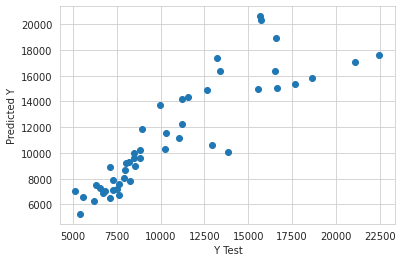

In [551]:
plt.scatter(y_test,predictions)
plt.xlabel(' Y Test')
plt.ylabel('Predicted Y')

Evaluating the Model


In [553]:
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 1609.8013415337646
MSE 4593678.073332681
RMSE 2143.286745475901


**Residuals**

Shape of the residuals distribution is almost normal distribution, but it needs more feature engineering.

Text(0.5, 0, 'Residual Distribution')

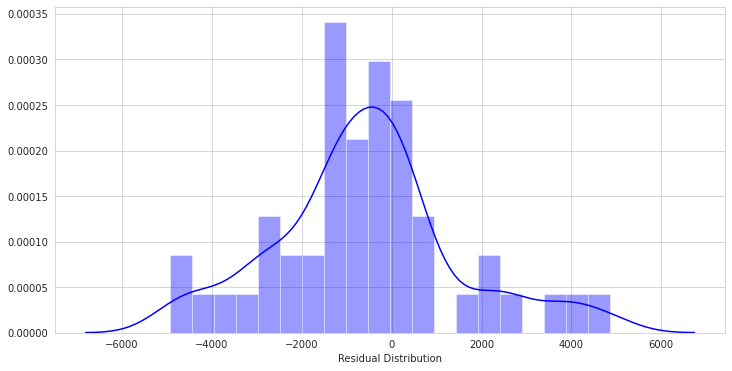

In [572]:
plt.figure(figsize=(12,6))
sns.distplot((y_test-predictions),bins=20,color='blue')
plt.xlabel('Residual Distribution')

**Conclusion**

In [565]:
coeffecients=pd.DataFrame(model.coef_,X.columns)
coeffecients.columns=['Coeffecient']
coeffecients

,Coeffecient
wheel-base,2199.294781
length,190.336177
width,-1337.082361
curb-weight,1997.036413
engine-size,1722.489215
bore,-119.554221
horsepower,2152.272851
city-mpg,-190.487332
highway-mpg,772.174026


Intepreting the coeffecients:
Hollding all other features fixed, a 1 unit increase in wheel-base is associated with an increase of 2199 total dollars spent. Also, like that a 1 unit increse in horsepower associatted with an increase of 2152 total dollars spent. Therefore, focussing on the variables wheel-base,curb-weight,engine-size,horsepower and highway-mpg is more likely beneficial for a car factory.